In [1]:
import pandas as pd
import numpy as np

url = 'Casos covid por provincias.xlsx'
df = pd.read_excel(url)
df = df.replace(np.nan, 0)
df=df[df['Provincia']=="Azuay"]
filtro = df.iloc[0].loc['19/3/2020':]
TASA_CRECIMIENTO = int(filtro.mean()*3)
print(TASA_CRECIMIENTO)

345


In [2]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

#PARAMETROS Y MATRICES DE ENTRADA
HOSPITALES = 1
CAMAS = 254
RESPIRADORES=8
Cuidados_Intensivos=8
PERSONAL=300

INFECTADOS=356
DIAS_INTERNADO = 10
DIAS_SIMULACION = 100


adultos_F=[]
adultos_M=[]

mayores_F=[]
mayores_M=[]

menores_F=[]
menores_M=[]

menores={}
adultos={}
mayores={}
atendidos={}
gastos_Totales=[]
cantidad_Personal={}
camas_disponibles={}
respiradores_disponibles={}
unidades_totales={}


persona_recuperadas={}
persona_fallecidas={}

nuemonia_adultos_F=[]
cuidados_adultos_F=[]
fallecidos_adultos_F=[]
recuperados_adultos_F=[]
nuemonia_adultos_M=[]
cuidados_adultos_M=[]
fallecidos_adultos_M=[]
recuperados_adultos_M=[]




nuemonia_mayores_F=[]
cuidados_mayores_F=[]
fallecidos_mayores_F=[]
recuperados_mayores_F=[]
nuemonia_mayores_M=[]
cuidados_mayores_M=[]
fallecidos_mayores_M=[]
recuperados_mayores_M=[]

sintomas_menores_F=[]
sintomas_menores_M=[]
neumonia_menores_F=[]
neumonia_menores_M=[]
ciudados_menores_F=[]
ciudados_menores_M=[]
fallecidos_menores_F=[]
fallecidos_menores_M=[]
recuperados_menores_F=[]
recuperados_menores_M=[]




class Hospital(object):

    def __init__(self, env,num_cama,name,num_personal,num_Cuidados_Intensivos, num_respiradores):
            self.env = env
            self.num_cama = num_cama
            self.num_personal = num_personal
            self.num_Cuidados_Intensivos=num_Cuidados_Intensivos
            self.num_respiradores=num_respiradores
            self.camas = simpy.Resource(env, num_cama)
            self.personal = simpy.Resource(env, num_personal)
            self.Cuidados_Intensivos = simpy.Resource(env, num_Cuidados_Intensivos)
            self.respiradores = simpy.Resource(env, num_respiradores)
            self.name = name
        
    def ingresar(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        print("Paciente ", paciente, "salió de la hospitalización en el día ", int(self.env.now))
            
    def Cuidados_Intensivoss(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-3, DIAS_INTERNADO+11))
        print("Paciente", paciente, "salió de la Cuidados Intensivos en el día ", int(self.env.now))
    
    def medicos(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-3, DIAS_INTERNADO+11))
        print("Paciente", paciente, "finalizó su atención con el personal el día ", int(self.env.now))
    
def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    tipo_paciente = random.randint(1,100)
    
    
    if (tipo_paciente <= 7 and tipo_paciente > 0):
        mayores[env.now] = mayores[env.now] + 1 if env.now in mayores else  1
        
        sexo= random.randint(1,7)
        if(sexo<=3):
            mayores_M.append(1)
          
            neumonia= random.randint(1,100)
            if (neumonia<=95):
                nuemonia_mayores_M.append(1)

               
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    peticionCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in peticionCamas:
                        print("Paciente mayor ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now
                        camas_disponibles[env.now] = camas_disponibles[env.now] + 1 if env.now in camas_disponibles else  1

                        
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente mayor", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                                #arrive3 = env.now
                                cantidad_Personal[env.now] = cantidad_Personal[env.now] + 1 if env.now in cantidad_Personal else 1 
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                cuidados_mayores_M.append(1)
                               
                                with hospital.Cuidados_Intensivos.request() as Cuidados_Intensivos:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala Cuidados_Intensivos del hospital
                                    requerimientoCuidados_Intensivos = yield Cuidados_Intensivos | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if Cuidados_Intensivos in requerimientoCuidados_Intensivos:
                                        print("El paciente mayor ", paciente, "accede a la Cuidados_Intensivos y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.Cuidados_Intensivoss(paciente))
                                        estado = random.randint(1,100)
                                        unidades_totales[env.now] = unidades_totales[env.now] + 1 if env.now in unidades_totales else  1
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            fallecidos_mayores_M.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            recuperados_mayores_M.append(1)

                                    else:
                                        print("El paciente mayor" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , "  dias y fallece por falta de insumos medicos")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        fallecidos_mayores_M.append(1)

                                   
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente mayor " , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Cuidados_Intensivos.")
                                recuperados_mayores_M.append(1)
                               

                            
                    else:
                        print("Paciente mayor" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        fallecidos_mayores_M.append(1)
                   
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente mayor M " , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Neumonia.")
                recuperados_mayores_M.append(1)
           
            
            
        else:
            
            mayores_F.append(1)
            
            
            neumonia= random.randint(1,100)
            if (neumonia<=95):
                nuemonia_mayores_F.append(1)
               
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    peticionCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in peticionCamas:
                        print("Paciente mayor ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now
                        camas_disponibles[env.now] = camas_disponibles[env.now] + 1 if env.now in camas_disponibles else  1

                      
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente mayor ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                               
                                cantidad_Personal[env.now] = cantidad_Personal[env.now] + 1 if env.now in cantidad_Personal else 1 
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                               
                                cuidados_mayores_F.append(1)

                                with hospital.Cuidados_Intensivos.request() as Cuidados_Intensivos:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala Cuidados_Intensivos del hospital
                                    requerimientoCuidados_Intensivos = yield Cuidados_Intensivos | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if Cuidados_Intensivos in requerimientoCuidados_Intensivos:
                                        print("El paciente mayor F  ", paciente, "accede a la Cuidados_Intensivos y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.Cuidados_Intensivoss(paciente))
                                        estado = random.randint(1,100)
                                        unidades_totales[env.now] = unidades_totales[env.now] + 1 if env.now in unidades_totales else  1
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            fallecidos_mayores_F.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            recuperados_mayores_F.append(1)
                                    else:
                                        print("El paciente mayor" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , "  dias y fallece por falta de insumos medicos")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        fallecidos_mayores_F.append(1)
                                    
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente mayor " , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Cuidados_Intensivos.")
                                recuperados_mayores_F.append(1)
                                

                            
                    else:
                        print("Paciente mayor " , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        fallecidos_mayores_F.append(1)
                    
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente mayor" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Neumonia.")
                recuperados_mayores_F.append(1)
            

   
    elif (tipo_paciente <= 28 and tipo_paciente > 7):
       
        menores[env.now] = menores[env.now] + 1 if env.now in menores else  1

        sexo= random.randint(1,28)
        if(sexo<=13):
            menores_M.append(1)
            
            
            
            sintomas= random.randint(1,100)
            if (sintomas<=5):
                sintomas_menores_M.append(1)

                
                neumonia= random.randint(1,100)
                if (neumonia<=75): 
                    neumonia_menores_M.append(1)

                    
                    with hospital.camas.request() as cama:
                        dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                        peticionCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                        wait = env.now - arrive
                        if cama in peticionCamas:
                            print("Paciente menor  ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                            yield env.process(hospital.ingresar(paciente))
                            arrive2 = env.now
                            camas_disponibles[env.now] = camas_disponibles[env.now] + 1 if env.now in camas_disponibles else  1

                            
                            with hospital.personal.request() as persona:
                                dias_esperando_personal = random.randint(1,2)
                                requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                                wait2 = env.now - arrive2
                                if persona in requerimientoPersonal:
                                    print("El paciente menor", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                    yield env.process(hospital.medicos(paciente))
                                    
                                    cantidad_Personal[env.now] = cantidad_Personal[env.now] + 1 if env.now in cantidad_Personal else 1 
                                arrive3 = env.now

                                intensivo= random.randint(1,100)
                                if (intensivo<=25):
                                    ciudados_menores_M.append(1)
                                    
                                    with hospital.Cuidados_Intensivos.request() as Cuidados_Intensivos:
                                        dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala Cuidados_Intensivos del hospital
                                        requerimientoCuidados_Intensivos = yield Cuidados_Intensivos | env.timeout(dias_esperando)
                                        wait3 = env.now - arrive3
                                        if Cuidados_Intensivos in requerimientoCuidados_Intensivos:
                                            print("El paciente menor ", paciente, "accede a la Cuidados_Intensivos y se le asigna un respirador", "hospital " , hospital.name)
                                            yield env.process(hospital.Cuidados_Intensivoss(paciente))
                                            estado = random.randint(1,100)
                                            unidades_totales[env.now] = unidades_totales[env.now] + 1 if env.now in unidades_totales else  1
                                            if (estado <= 50) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                fallecidos_menores_M.append(1)
                                            else:
                                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                                recuperados_menores_M.append(1)
                                        else:
                                            print("El paciente menor" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , "  dias y fallece por falta de insumos medicos")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            fallecidos_menores_M.append(1)
                                        
                                else:
                                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                    print("Paciente menor" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Cuidados_Intensivos.")
                                    recuperados_menores_M.append(1)
                                    

                    
                        else:
                            print("Paciente menor" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                            fallecidos_menores_M.append(1)
                        
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                    print("Paciente menor" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Neumonia.")
                    recuperados_menores_M.append(1)

                

            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente menor" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Sintomas.")
           
            
        else:
            menores_F.append(1)
           
            sintomas= random.randint(1,100)
            if (sintomas<=5):
                sintomas_menores_F.append(1)
                
               
                neumonia= random.randint(1,100)
                if (neumonia<=75): 
                    neumonia_menores_F.append(1)

                    
                    with hospital.camas.request() as cama:
                        dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                        peticionCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                        wait = env.now - arrive
                        if cama in peticionCamas:
                            print("Paciente menor F", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                            yield env.process(hospital.ingresar(paciente))
                            arrive2 = env.now
                            camas_disponibles[env.now] = camas_disponibles[env.now] + 1 if env.now in camas_disponibles else  1

                            
                            with hospital.personal.request() as persona:
                                dias_esperando_personal = random.randint(1,2)
                                requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                                wait2 = env.now - arrive2
                                if persona in requerimientoPersonal:
                                    print("El paciente menor F ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                    yield env.process(hospital.medicos(paciente))
                                    
                                    cantidad_Personal[env.now] = cantidad_Personal[env.now] + 1 if env.now in cantidad_Personal else 1 
                                arrive3 = env.now

                                intensivo= random.randint(1,100)
                                if (intensivo<=25):
                                    ciudados_menores_F.append(1)
                                    
                                    with hospital.Cuidados_Intensivos.request() as Cuidados_Intensivos:
                                        dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala Cuidados_Intensivos del hospital
                                        requerimientoCuidados_Intensivos = yield Cuidados_Intensivos | env.timeout(dias_esperando)
                                        wait3 = env.now - arrive3
                                        if Cuidados_Intensivos in requerimientoCuidados_Intensivos:
                                            print("El paciente menor F", paciente, "accede a la Cuidados_Intensivos y se le asigna un respirador", "hospital " , hospital.name)
                                            yield env.process(hospital.Cuidados_Intensivoss(paciente))
                                            estado = random.randint(1,100)
                                            unidades_totales[env.now] = unidades_totales[env.now] + 1 if env.now in unidades_totales else  1
                                            if (estado <= 50) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                fallecidos_menores_F.append(1)
                                            else:
                                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                                recuperados_menores_F.append(1)
                                        else:
                                            print("El paciente menor F" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , "  dias y fallece por falta de insumos medicos")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            fallecidos_menores_F.append(1)
                                    
                                else:
                                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                    print("Paciente menor F" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Cuidados_Intensivos.")
                                    recuperados_menores_F.append(1)
                                    

                                
                        else:
                            print("Paciente menor F" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                            fallecidos_menores_F.append(1)
                
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                    print("Paciente menor F" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Neumonia.")
                    recuperados_menores_F.append(1)
                

            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente menor F" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Sintomas.")
                recuperados_menores_F.append(1)
            
            
        
    else:
        adultos[env.now] = adultos[env.now] + 1 if env.now in adultos else  1
    
        
        sexo= random.randint(1,65)
        
        if(sexo<=30):
            adultos_M.append(1)
            
            
            neumonia= random.randint(1,100)
            if (neumonia<=75):
                nuemonia_adultos_M.append(1)
                
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    peticionCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in peticionCamas:
                        print("Paciente adulto M  ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now
                        camas_disponibles[env.now] = camas_disponibles[env.now] + 1 if env.now in camas_disponibles else  1

                        
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente adulto M ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                                
                                cantidad_Personal[env.now] = cantidad_Personal[env.now] + 1 if env.now in cantidad_Personal else 1 
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                cuidados_adultos_M.append(1)
                            
                                with hospital.Cuidados_Intensivos.request() as Cuidados_Intensivos:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala Cuidados_Intensivos del hospital
                                    requerimientoCuidados_Intensivos = yield Cuidados_Intensivos | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if Cuidados_Intensivos in requerimientoCuidados_Intensivos:
                                        print("El paciente adulto M  ", paciente, "accede a la Cuidados_Intensivos y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.Cuidados_Intensivoss(paciente))
                                        estado = random.randint(1,100)
                                        unidades_totales[env.now] = unidades_totales[env.now] + 1 if env.now in unidades_totales else  1
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            fallecidos_adultos_M.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            recuperados_adultos_M.append(1)
                                    else:
                                        print("El paciente adulto M" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , "  dias y fallece por falta de insumos medicos")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        fallecidos_adultos_M.append(1)
                                
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente adulto M " , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Cuidados_Intensivos.")
                                recuperados_adultos_M.append(1)
                            

                            
                    else:
                        print("Paciente adulto M " , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        fallecidos_adultos_M.append(1)
            
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente adulto M " , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Neumonia.")
                recuperados_adultos_M.append(1)
            
        
        else:
            adultos_F.append(1)
        
        
            
            neumonia= random.randint(1,100)
            if (neumonia<=75):
                nuemonia_adultos_F.append(1)

                
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    peticionCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in peticionCamas:
                        print("Paciente adulto F  ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now
                        camas_disponibles[env.now] = camas_disponibles[env.now] + 1 if env.now in camas_disponibles else  1

                        
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente adulto F  ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                                #arrive3 = env.now
                                cantidad_Personal[env.now] = cantidad_Personal[env.now] + 1 if env.now in cantidad_Personal else 1 
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                cuidados_adultos_F.append(1)
                                
                                with hospital.Cuidados_Intensivos.request() as Cuidados_Intensivos:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala Cuidados_Intensivos del hospital
                                    requerimientoCuidados_Intensivos = yield Cuidados_Intensivos | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if Cuidados_Intensivos in requerimientoCuidados_Intensivos:
                                        print("El paciente adulto F ", paciente, "accede a la Cuidados_Intensivos y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.Cuidados_Intensivoss(paciente))
                                        estado = random.randint(1,100)
                                        unidades_totales[env.now] = unidades_totales[env.now] + 1 if env.now in unidades_totales else  1
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            fallecidos_adultos_F.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            recuperados_adultos_F.append(1)
                                    else:
                                        print("El paciente adulto F " , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de insumos medicos")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        fallecidos_adultos_F.append(1)
                                    
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente adulto F " , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Cuidados_Intensivos.")
                                recuperados_adultos_F.append(1)
                                
                        
                    else:
                        print("Paciente adulto F" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        fallecidos_adultos_F.append(1)
                    
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print(" Paciente adulto F N" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Neumonia.")
                recuperados_adultos_F.append(1)
            
        
        
       
    
def ejecutar(env, tasa_crecimiento, infectados):
    hospital = Hospital(env, CAMAS, "Centro Medico",PERSONAL,Cuidados_Intensivos,RESPIRADORES)
    for i in range(infectados):
        asignar_hospital(env, hospital, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospital, paciente)
                
def asignar_hospital(env, hospital, paciente):
    hosp_esc = 1
    if (hosp_esc == 1):
        print("Llega el paciente", paciente, " en el día ", env.now)
        env.process(llegada_paciente(env, hospital, paciente))

print("Simulacion COVID-19")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO,INFECTADOS))
env.run(until=DIAS_SIMULACION)

Simulacion COVID-19
Llega el paciente 0  en el día  0
Llega el paciente 1  en el día  0
Llega el paciente 2  en el día  0
Llega el paciente 3  en el día  0
Llega el paciente 4  en el día  0
Llega el paciente 5  en el día  0
Llega el paciente 6  en el día  0
Llega el paciente 7  en el día  0
Llega el paciente 8  en el día  0
Llega el paciente 9  en el día  0
Llega el paciente 10  en el día  0
Llega el paciente 11  en el día  0
Llega el paciente 12  en el día  0
Llega el paciente 13  en el día  0
Llega el paciente 14  en el día  0
Llega el paciente 15  en el día  0
Llega el paciente 16  en el día  0
Llega el paciente 17  en el día  0
Llega el paciente 18  en el día  0
Llega el paciente 19  en el día  0
Llega el paciente 20  en el día  0
Llega el paciente 21  en el día  0
Llega el paciente 22  en el día  0
Llega el paciente 23  en el día  0
Llega el paciente 24  en el día  0
Llega el paciente 25  en el día  0
Llega el paciente 26  en el día  0
Llega el paciente 27  en el día  0
Llega el p

Paciente adulto F   129  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   131  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   132  se le asigna una cama  hospital  Centro Medico
Paciente menor F 133  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   136  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   137  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   138  se le asigna una cama  hospital  Centro Medico
Paciente mayor  139  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   142  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   144  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   145  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   146  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   147  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   148  se le asigna una cama  hospital  Centro Medico

Paciente menor F 497 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 499 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 501 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 505 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 513 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 514 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 516 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 518 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 519 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 521 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 522 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 529 en el 

Llega el paciente 924  en el día  2
Llega el paciente 925  en el día  2
Llega el paciente 926  en el día  2
Llega el paciente 927  en el día  2
Llega el paciente 928  en el día  2
Llega el paciente 929  en el día  2
Llega el paciente 930  en el día  2
Llega el paciente 931  en el día  2
Llega el paciente 932  en el día  2
Llega el paciente 933  en el día  2
Llega el paciente 934  en el día  2
Llega el paciente 935  en el día  2
Llega el paciente 936  en el día  2
Llega el paciente 937  en el día  2
Llega el paciente 938  en el día  2
Llega el paciente 939  en el día  2
Llega el paciente 940  en el día  2
Llega el paciente 941  en el día  2
Llega el paciente 942  en el día  2
Llega el paciente 943  en el día  2
Llega el paciente 944  en el día  2
Llega el paciente 945  en el día  2
Llega el paciente 946  en el día  2
Llega el paciente 947  en el día  2
Llega el paciente 948  en el día  2
Llega el paciente 949  en el día  2
Llega el paciente 950  en el día  2
Llega el paciente 951  en el

Llega el paciente 1176  en el día  3
Llega el paciente 1177  en el día  3
Llega el paciente 1178  en el día  3
Llega el paciente 1179  en el día  3
Llega el paciente 1180  en el día  3
Llega el paciente 1181  en el día  3
Llega el paciente 1182  en el día  3
Llega el paciente 1183  en el día  3
Llega el paciente 1184  en el día  3
Llega el paciente 1185  en el día  3
Llega el paciente 1186  en el día  3
Llega el paciente 1187  en el día  3
Llega el paciente 1188  en el día  3
Llega el paciente 1189  en el día  3
Llega el paciente 1190  en el día  3
Llega el paciente 1191  en el día  3
Llega el paciente 1192  en el día  3
Llega el paciente 1193  en el día  3
Llega el paciente 1194  en el día  3
Llega el paciente 1195  en el día  3
Llega el paciente 1196  en el día  3
Llega el paciente 1197  en el día  3
Llega el paciente 1198  en el día  3
Llega el paciente 1199  en el día  3
Llega el paciente 1200  en el día  3
Llega el paciente 1201  en el día  3
Llega el paciente 1202  en el día  3
L

Llega el paciente 1546  en el día  4
Llega el paciente 1547  en el día  4
Llega el paciente 1548  en el día  4
Llega el paciente 1549  en el día  4
Llega el paciente 1550  en el día  4
Llega el paciente 1551  en el día  4
Llega el paciente 1552  en el día  4
Llega el paciente 1553  en el día  4
Llega el paciente 1554  en el día  4
Llega el paciente 1555  en el día  4
Llega el paciente 1556  en el día  4
Llega el paciente 1557  en el día  4
Llega el paciente 1558  en el día  4
Llega el paciente 1559  en el día  4
Llega el paciente 1560  en el día  4
Llega el paciente 1561  en el día  4
Llega el paciente 1562  en el día  4
Llega el paciente 1563  en el día  4
Llega el paciente 1564  en el día  4
Llega el paciente 1565  en el día  4
Llega el paciente 1566  en el día  4
Llega el paciente 1567  en el día  4
Llega el paciente 1568  en el día  4
Llega el paciente 1569  en el día  4
Llega el paciente 1570  en el día  4
Llega el paciente 1571  en el día  4
Llega el paciente 1572  en el día  4
L

Paciente  111 salió de la hospitalización en el día  5
Paciente  114 salió de la hospitalización en el día  5
Paciente  115 salió de la hospitalización en el día  5
Paciente  136 salió de la hospitalización en el día  5
Paciente  146 salió de la hospitalización en el día  5
Paciente  192 salió de la hospitalización en el día  5
Paciente  209 salió de la hospitalización en el día  5
Paciente  238 salió de la hospitalización en el día  5
Paciente  245 salió de la hospitalización en el día  5
Paciente  278 salió de la hospitalización en el día  5
Paciente  293 salió de la hospitalización en el día  5
Paciente  312 salió de la hospitalización en el día  5
Paciente  320 salió de la hospitalización en el día  5
Paciente  322 salió de la hospitalización en el día  5
Paciente  324 salió de la hospitalización en el día  5
Paciente  325 salió de la hospitalización en el día  5
Paciente  339 salió de la hospitalización en el día  5
Paciente  342 salió de la hospitalización en el día  5
Paciente  

Paciente menor 1957 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 1959 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 1960 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 1961 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 1962 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 1965 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  1967 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 1968 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 1969 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 1972 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 1977 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M 

Paciente adulto F 596 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 610 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 616 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  628 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 645 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  654 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  670 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 691 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
El paciente adulto F   14  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  17  es 

Paciente adulto F 416 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 435 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 440 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  450 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 494 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 517 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 532 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  544 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 590 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.

Paciente menor 3098 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 3099 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  3104 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 3106 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 3107 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 3108 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 3109 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto F 400 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente mayor 402 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  429 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 436 en el hospital  Centro Medi

Llega el paciente 3429  en el día  9
Llega el paciente 3430  en el día  9
Llega el paciente 3431  en el día  9
Llega el paciente 3432  en el día  9
Llega el paciente 3433  en el día  9
Llega el paciente 3434  en el día  9
Llega el paciente 3435  en el día  9
Llega el paciente 3436  en el día  9
Llega el paciente 3437  en el día  9
Llega el paciente 3438  en el día  9
Llega el paciente 3439  en el día  9
Llega el paciente 3440  en el día  9
Llega el paciente 3441  en el día  9
Llega el paciente 3442  en el día  9
Llega el paciente 3443  en el día  9
Llega el paciente 3444  en el día  9
Llega el paciente 3445  en el día  9
Llega el paciente 3446  en el día  9
Llega el paciente 3447  en el día  9
Llega el paciente 3448  en el día  9
Llega el paciente 3449  en el día  9
Llega el paciente 3450  en el día  9
Llega el paciente 3451  en el día  9
Llega el paciente 3452  en el día  9
Llega el paciente 3453  en el día  9
Llega el paciente 3454  en el día  9
Llega el paciente 3455  en el día  9
L

Llega el paciente 3544  en el día  10
Llega el paciente 3545  en el día  10
Llega el paciente 3546  en el día  10
Llega el paciente 3547  en el día  10
Llega el paciente 3548  en el día  10
Llega el paciente 3549  en el día  10
Llega el paciente 3550  en el día  10
Llega el paciente 3551  en el día  10
Llega el paciente 3552  en el día  10
Llega el paciente 3553  en el día  10
Llega el paciente 3554  en el día  10
Llega el paciente 3555  en el día  10
Llega el paciente 3556  en el día  10
Llega el paciente 3557  en el día  10
Llega el paciente 3558  en el día  10
Llega el paciente 3559  en el día  10
Llega el paciente 3560  en el día  10
Llega el paciente 3561  en el día  10
Llega el paciente 3562  en el día  10
Llega el paciente 3563  en el día  10
Llega el paciente 3564  en el día  10
Llega el paciente 3565  en el día  10
Llega el paciente 3566  en el día  10
Llega el paciente 3567  en el día  10
Llega el paciente 3568  en el día  10
Llega el paciente 3569  en el día  10
Llega el pac

Paciente menor 3789 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 3792 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 3795 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  3797 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 3801 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 3802 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  404 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 444 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  466 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor 469 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  490 en e

 Paciente adulto F N 4051 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 4052 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  4053 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 4058 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 4062 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 4063 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 4066 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 4067 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 4069 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 4070 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 4071 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  4074 en

Llega el paciente 4429  en el día  12
Llega el paciente 4430  en el día  12
Llega el paciente 4431  en el día  12
Llega el paciente 4432  en el día  12
Llega el paciente 4433  en el día  12
Llega el paciente 4434  en el día  12
Llega el paciente 4435  en el día  12
Llega el paciente 4436  en el día  12
Llega el paciente 4437  en el día  12
Llega el paciente 4438  en el día  12
Llega el paciente 4439  en el día  12
Llega el paciente 4440  en el día  12
Llega el paciente 4441  en el día  12
Llega el paciente 4442  en el día  12
Llega el paciente 4443  en el día  12
Llega el paciente 4444  en el día  12
Llega el paciente 4445  en el día  12
Llega el paciente 4446  en el día  12
Llega el paciente 4447  en el día  12
Llega el paciente 4448  en el día  12
Llega el paciente 4449  en el día  12
Llega el paciente 4450  en el día  12
Llega el paciente 4451  en el día  12
Llega el paciente 4452  en el día  12
Llega el paciente 4453  en el día  12
Llega el paciente 4454  en el día  12
Llega el pac

Paciente adulto F 2496 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente mayor 2511 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 2514 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente mayor 2545 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  2579 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  2582 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente menor F 2606 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 2611 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 2708 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cam

Paciente menor 4608 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 4614 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  4618 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 4621 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 4624 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 4627 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 4632 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 4634 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  4638 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 4649 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 4651 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 465

Llega el paciente 4996  en el día  14
Llega el paciente 4997  en el día  14
Llega el paciente 4998  en el día  14
Llega el paciente 4999  en el día  14
Llega el paciente 5000  en el día  14
Llega el paciente 5001  en el día  14
Llega el paciente 5002  en el día  14
Llega el paciente 5003  en el día  14
Llega el paciente 5004  en el día  14
Llega el paciente 5005  en el día  14
Llega el paciente 5006  en el día  14
Llega el paciente 5007  en el día  14
Llega el paciente 5008  en el día  14
Llega el paciente 5009  en el día  14
Llega el paciente 5010  en el día  14
Llega el paciente 5011  en el día  14
Llega el paciente 5012  en el día  14
Llega el paciente 5013  en el día  14
Llega el paciente 5014  en el día  14
Llega el paciente 5015  en el día  14
Llega el paciente 5016  en el día  14
Llega el paciente 5017  en el día  14
Llega el paciente 5018  en el día  14
Llega el paciente 5019  en el día  14
Llega el paciente 5020  en el día  14
Llega el paciente 5021  en el día  14
Llega el pac

Paciente adulto M  1810 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1817 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1823 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1838 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor  1888 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1901 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  1919 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1947 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  1963 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a u

Llega el paciente 5425  en el día  15
Llega el paciente 5426  en el día  15
Llega el paciente 5427  en el día  15
Llega el paciente 5428  en el día  15
Llega el paciente 5429  en el día  15
Llega el paciente 5430  en el día  15
Llega el paciente 5431  en el día  15
Llega el paciente 5432  en el día  15
Llega el paciente 5433  en el día  15
Llega el paciente 5434  en el día  15
Llega el paciente 5435  en el día  15
Llega el paciente 5436  en el día  15
Llega el paciente 5437  en el día  15
Llega el paciente 5438  en el día  15
Llega el paciente 5439  en el día  15
Llega el paciente 5440  en el día  15
Llega el paciente 5441  en el día  15
Llega el paciente 5442  en el día  15
Llega el paciente 5443  en el día  15
Llega el paciente 5444  en el día  15
Llega el paciente 5445  en el día  15
Llega el paciente 5446  en el día  15
Llega el paciente 5447  en el día  15
Llega el paciente 5448  en el día  15
Llega el paciente 5449  en el día  15
Llega el paciente 5450  en el día  15
Llega el pac

Paciente adulto F 1902 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  1909 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  1917 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1937 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1949 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1953 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1982 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1994 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 2001 en el hospital  Centro Medico  espero  10  dias y fallece por falta de 

Llega el paciente 5658  en el día  16
Llega el paciente 5659  en el día  16
Llega el paciente 5660  en el día  16
Llega el paciente 5661  en el día  16
Llega el paciente 5662  en el día  16
Llega el paciente 5663  en el día  16
Llega el paciente 5664  en el día  16
Llega el paciente 5665  en el día  16
Llega el paciente 5666  en el día  16
Llega el paciente 5667  en el día  16
Llega el paciente 5668  en el día  16
Llega el paciente 5669  en el día  16
Llega el paciente 5670  en el día  16
Llega el paciente 5671  en el día  16
Llega el paciente 5672  en el día  16
Llega el paciente 5673  en el día  16
Llega el paciente 5674  en el día  16
Llega el paciente 5675  en el día  16
Llega el paciente 5676  en el día  16
Llega el paciente 5677  en el día  16
Llega el paciente 5678  en el día  16
Llega el paciente 5679  en el día  16
Llega el paciente 5680  en el día  16
Llega el paciente 5681  en el día  16
Llega el paciente 5682  en el día  16
Llega el paciente 5683  en el día  16
Llega el pac

Paciente adulto M  933 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 993 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  1024 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1027 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente mayor  1029 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1061 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1072 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1077 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  1083 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acc

Llega el paciente 5978  en el día  17
Llega el paciente 5979  en el día  17
Llega el paciente 5980  en el día  17
Llega el paciente 5981  en el día  17
Llega el paciente 5982  en el día  17
Llega el paciente 5983  en el día  17
Llega el paciente 5984  en el día  17
Llega el paciente 5985  en el día  17
Llega el paciente 5986  en el día  17
Llega el paciente 5987  en el día  17
Llega el paciente 5988  en el día  17
Llega el paciente 5989  en el día  17
Llega el paciente 5990  en el día  17
Llega el paciente 5991  en el día  17
Llega el paciente 5992  en el día  17
Llega el paciente 5993  en el día  17
Llega el paciente 5994  en el día  17
Llega el paciente 5995  en el día  17
Llega el paciente 5996  en el día  17
Llega el paciente 5997  en el día  17
Llega el paciente 5998  en el día  17
Llega el paciente 5999  en el día  17
Llega el paciente 6000  en el día  17
Llega el paciente 6001  en el día  17
Llega el paciente 6002  en el día  17
Llega el paciente 6003  en el día  17
Llega el pac

Paciente adulto F 3435 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  3467 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 3468 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  3475 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  3542 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  3578 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 3584 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  3590 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  3661 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acces

Llega el paciente 6505  en el día  18
Llega el paciente 6506  en el día  18
Llega el paciente 6507  en el día  18
Llega el paciente 6508  en el día  18
Llega el paciente 6509  en el día  18
Llega el paciente 6510  en el día  18
Llega el paciente 6511  en el día  18
Llega el paciente 6512  en el día  18
Llega el paciente 6513  en el día  18
Llega el paciente 6514  en el día  18
Llega el paciente 6515  en el día  18
Llega el paciente 6516  en el día  18
Llega el paciente 6517  en el día  18
Llega el paciente 6518  en el día  18
Llega el paciente 6519  en el día  18
Llega el paciente 6520  en el día  18
Llega el paciente 6521  en el día  18
Llega el paciente 6522  en el día  18
Llega el paciente 6523  en el día  18
Llega el paciente 6524  en el día  18
Llega el paciente 6525  en el día  18
Llega el paciente 6526  en el día  18
Llega el paciente 6527  en el día  18
Llega el paciente 6528  en el día  18
Llega el paciente 6529  en el día  18
Llega el paciente 6530  en el día  18
Llega el pac

Llega el paciente 6602  en el día  19
Llega el paciente 6603  en el día  19
Llega el paciente 6604  en el día  19
Llega el paciente 6605  en el día  19
Llega el paciente 6606  en el día  19
Llega el paciente 6607  en el día  19
Llega el paciente 6608  en el día  19
Llega el paciente 6609  en el día  19
Llega el paciente 6610  en el día  19
Llega el paciente 6611  en el día  19
Llega el paciente 6612  en el día  19
Llega el paciente 6613  en el día  19
Llega el paciente 6614  en el día  19
Llega el paciente 6615  en el día  19
Llega el paciente 6616  en el día  19
Llega el paciente 6617  en el día  19
Llega el paciente 6618  en el día  19
Llega el paciente 6619  en el día  19
Llega el paciente 6620  en el día  19
Llega el paciente 6621  en el día  19
Llega el paciente 6622  en el día  19
Llega el paciente 6623  en el día  19
Llega el paciente 6624  en el día  19
Llega el paciente 6625  en el día  19
Llega el paciente 6626  en el día  19
Llega el paciente 6627  en el día  19
Llega el pac

Paciente menor F 6611 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 6612 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 6616 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 6618 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 6619 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 6622 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 6626 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 6632 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 6635 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 6639 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 6641 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 6643 en el hosp

Paciente 194 finalizó su atención con el personal el día  20
Paciente 350 finalizó su atención con el personal el día  20
Paciente 152 finalizó su atención con el personal el día  20
Paciente 267 finalizó su atención con el personal el día  20
Paciente 318 finalizó su atención con el personal el día  20
Paciente 338 finalizó su atención con el personal el día  20
Paciente 228 finalizó su atención con el personal el día  20
Paciente 289 finalizó su atención con el personal el día  20
Paciente 87 salió de la Cuidados Intensivos en el día  20
Paciente  423 salió de la hospitalización en el día  20
Llega el paciente 6912  en el día  20
Llega el paciente 6913  en el día  20
Llega el paciente 6914  en el día  20
Llega el paciente 6915  en el día  20
Llega el paciente 6916  en el día  20
Llega el paciente 6917  en el día  20
Llega el paciente 6918  en el día  20
Llega el paciente 6919  en el día  20
Llega el paciente 6920  en el día  20
Llega el paciente 6921  en el día  20
Llega el paciente 

Paciente adulto M  6997 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 6998 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 6999 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 7004 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 7006 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 7009 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 7011 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 7012 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 7014 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 7015 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 7018 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente men

Llega el paciente 7414  en el día  21
Llega el paciente 7415  en el día  21
Llega el paciente 7416  en el día  21
Llega el paciente 7417  en el día  21
Llega el paciente 7418  en el día  21
Llega el paciente 7419  en el día  21
Llega el paciente 7420  en el día  21
Llega el paciente 7421  en el día  21
Llega el paciente 7422  en el día  21
Llega el paciente 7423  en el día  21
Llega el paciente 7424  en el día  21
Llega el paciente 7425  en el día  21
Llega el paciente 7426  en el día  21
Llega el paciente 7427  en el día  21
Llega el paciente 7428  en el día  21
Llega el paciente 7429  en el día  21
Llega el paciente 7430  en el día  21
Llega el paciente 7431  en el día  21
Llega el paciente 7432  en el día  21
Llega el paciente 7433  en el día  21
Llega el paciente 7434  en el día  21
Llega el paciente 7435  en el día  21
Llega el paciente 7436  en el día  21
Llega el paciente 7437  en el día  21
Llega el paciente 7438  en el día  21
Llega el paciente 7439  en el día  21
Llega el pac

Paciente adulto F 4882 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4885 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4897 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4911 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4922 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4935 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4965 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4973 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5079 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso 

Paciente menor 7807 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  7811 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 7812 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  7818 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 7820 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 7824 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 7826 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 7828 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  7829 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 7831 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 7832 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  7836 en el hospit

Paciente 148 finalizó su atención con el personal el día  23
Paciente 100 finalizó su atención con el personal el día  23
Paciente  1186 salió de la hospitalización en el día  23
Paciente  1426 salió de la hospitalización en el día  23
Llega el paciente 7947  en el día  23
Llega el paciente 7948  en el día  23
Llega el paciente 7949  en el día  23
Llega el paciente 7950  en el día  23
Llega el paciente 7951  en el día  23
Llega el paciente 7952  en el día  23
Llega el paciente 7953  en el día  23
Llega el paciente 7954  en el día  23
Llega el paciente 7955  en el día  23
Llega el paciente 7956  en el día  23
Llega el paciente 7957  en el día  23
Llega el paciente 7958  en el día  23
Llega el paciente 7959  en el día  23
Llega el paciente 7960  en el día  23
Llega el paciente 7961  en el día  23
Llega el paciente 7962  en el día  23
Llega el paciente 7963  en el día  23
Llega el paciente 7964  en el día  23
Llega el paciente 7965  en el día  23
Llega el paciente 7966  en el día  23
Lleg

Paciente menor 8117 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 8118 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 8119 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 8120 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 8121 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 8130 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 8133 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 8136 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  8137 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 8142 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 8147 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 8151 en el 

Llega el paciente 8392  en el día  24
Llega el paciente 8393  en el día  24
Llega el paciente 8394  en el día  24
Llega el paciente 8395  en el día  24
Llega el paciente 8396  en el día  24
Llega el paciente 8397  en el día  24
Llega el paciente 8398  en el día  24
Llega el paciente 8399  en el día  24
Llega el paciente 8400  en el día  24
Llega el paciente 8401  en el día  24
Llega el paciente 8402  en el día  24
Llega el paciente 8403  en el día  24
Llega el paciente 8404  en el día  24
Llega el paciente 8405  en el día  24
Llega el paciente 8406  en el día  24
Llega el paciente 8407  en el día  24
Llega el paciente 8408  en el día  24
Llega el paciente 8409  en el día  24
Llega el paciente 8410  en el día  24
Llega el paciente 8411  en el día  24
Llega el paciente 8412  en el día  24
Llega el paciente 8413  en el día  24
Llega el paciente 8414  en el día  24
Llega el paciente 8415  en el día  24
Llega el paciente 8416  en el día  24
Llega el paciente 8417  en el día  24
Llega el pac

Paciente adulto M  8630 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  8633 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 8636 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  347 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F  14 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  5 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  49 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F  145 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F  39 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F  116 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F 3392 en el hospital

Llega el paciente 8745  en el día  25
Llega el paciente 8746  en el día  25
Llega el paciente 8747  en el día  25
Llega el paciente 8748  en el día  25
Llega el paciente 8749  en el día  25
Llega el paciente 8750  en el día  25
Llega el paciente 8751  en el día  25
Llega el paciente 8752  en el día  25
Llega el paciente 8753  en el día  25
Llega el paciente 8754  en el día  25
Llega el paciente 8755  en el día  25
Llega el paciente 8756  en el día  25
Llega el paciente 8757  en el día  25
Llega el paciente 8758  en el día  25
Llega el paciente 8759  en el día  25
Llega el paciente 8760  en el día  25
Llega el paciente 8761  en el día  25
Llega el paciente 8762  en el día  25
Llega el paciente 8763  en el día  25
Llega el paciente 8764  en el día  25
Llega el paciente 8765  en el día  25
Llega el paciente 8766  en el día  25
Llega el paciente 8767  en el día  25
Llega el paciente 8768  en el día  25
Llega el paciente 8769  en el día  25
Llega el paciente 8770  en el día  25
Llega el pac

Paciente mayor  4917 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4930 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4951 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4962 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4981 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5025 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5028 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5051 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5055 en el hospital  Centro Medico  espero  11  dias y fallece por falta d

Llega el paciente 9110  en el día  26
Llega el paciente 9111  en el día  26
Llega el paciente 9112  en el día  26
Llega el paciente 9113  en el día  26
Llega el paciente 9114  en el día  26
Llega el paciente 9115  en el día  26
Llega el paciente 9116  en el día  26
Llega el paciente 9117  en el día  26
Llega el paciente 9118  en el día  26
Llega el paciente 9119  en el día  26
Llega el paciente 9120  en el día  26
Llega el paciente 9121  en el día  26
Llega el paciente 9122  en el día  26
Llega el paciente 9123  en el día  26
Llega el paciente 9124  en el día  26
Llega el paciente 9125  en el día  26
Llega el paciente 9126  en el día  26
Llega el paciente 9127  en el día  26
Llega el paciente 9128  en el día  26
Llega el paciente 9129  en el día  26
Llega el paciente 9130  en el día  26
Llega el paciente 9131  en el día  26
Llega el paciente 9132  en el día  26
Llega el paciente 9133  en el día  26
Llega el paciente 9134  en el día  26
Llega el paciente 9135  en el día  26
Llega el pac

Paciente adulto M  5510 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor  5525 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5530 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F  254 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  305 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F 5544 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 5552 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5566 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5635 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Pacient

Paciente menor 9486 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 9490 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 9492 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 9495 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 9501 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 9502 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  9504 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  9506 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 9507 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 9510 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 9511 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  9

Paciente adulto M  7219 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente mayor 7227 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 7228 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  7247 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 7270 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente mayor  7284 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  7310 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 7327 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 7372 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una 

Llega el paciente 9967  en el día  28
Llega el paciente 9968  en el día  28
Llega el paciente 9969  en el día  28
Llega el paciente 9970  en el día  28
Llega el paciente 9971  en el día  28
Llega el paciente 9972  en el día  28
Llega el paciente 9973  en el día  28
Llega el paciente 9974  en el día  28
Llega el paciente 9975  en el día  28
Llega el paciente 9976  en el día  28
Llega el paciente 9977  en el día  28
Llega el paciente 9978  en el día  28
Llega el paciente 9979  en el día  28
Llega el paciente 9980  en el día  28
Llega el paciente 9981  en el día  28
Llega el paciente 9982  en el día  28
Llega el paciente 9983  en el día  28
Llega el paciente 9984  en el día  28
Llega el paciente 9985  en el día  28
Llega el paciente 9986  en el día  28
Llega el paciente 9987  en el día  28
Llega el paciente 9988  en el día  28
Llega el paciente 9989  en el día  28
Llega el paciente 9990  en el día  28
Llega el paciente 9991  en el día  28
Llega el paciente 9992  en el día  28
Llega el pac

Paciente adulto M  7235 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  7238 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  7258 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente mayor  7265 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 7274 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 7293 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  7319 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente mayor 7409 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  7410 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a un

Paciente menor F 10295 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 10297 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 10298 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 10309 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 10313 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 10314 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 10319 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 10321 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 10333 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 10337 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 10339 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente 

Llega el paciente 10427  en el día  30
Llega el paciente 10428  en el día  30
Llega el paciente 10429  en el día  30
Llega el paciente 10430  en el día  30
Llega el paciente 10431  en el día  30
Llega el paciente 10432  en el día  30
Llega el paciente 10433  en el día  30
Llega el paciente 10434  en el día  30
Llega el paciente 10435  en el día  30
Llega el paciente 10436  en el día  30
Llega el paciente 10437  en el día  30
Llega el paciente 10438  en el día  30
Llega el paciente 10439  en el día  30
Llega el paciente 10440  en el día  30
Llega el paciente 10441  en el día  30
Llega el paciente 10442  en el día  30
Llega el paciente 10443  en el día  30
Llega el paciente 10444  en el día  30
Llega el paciente 10445  en el día  30
Llega el paciente 10446  en el día  30
Llega el paciente 10447  en el día  30
Llega el paciente 10448  en el día  30
Llega el paciente 10449  en el día  30
Llega el paciente 10450  en el día  30
Llega el paciente 10451  en el día  30
Llega el paciente 10452  

Paciente adulto F 6085 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 6093 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  6127 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  6175 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 6181 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  6198 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 6203 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  6206 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 6235 en el hospital  Centro Medico  espero  12  dias y fallece por falta d

Llega el paciente 10934  en el día  31
Llega el paciente 10935  en el día  31
Llega el paciente 10936  en el día  31
Llega el paciente 10937  en el día  31
Llega el paciente 10938  en el día  31
Llega el paciente 10939  en el día  31
Llega el paciente 10940  en el día  31
Llega el paciente 10941  en el día  31
Llega el paciente 10942  en el día  31
Llega el paciente 10943  en el día  31
Llega el paciente 10944  en el día  31
Llega el paciente 10945  en el día  31
Llega el paciente 10946  en el día  31
Llega el paciente 10947  en el día  31
Llega el paciente 10948  en el día  31
Llega el paciente 10949  en el día  31
Llega el paciente 10950  en el día  31
Llega el paciente 10951  en el día  31
Llega el paciente 10952  en el día  31
Llega el paciente 10953  en el día  31
Llega el paciente 10954  en el día  31
Llega el paciente 10955  en el día  31
Llega el paciente 10956  en el día  31
Llega el paciente 10957  en el día  31
Llega el paciente 10958  en el día  31
Llega el paciente 10959  

Paciente adulto M  7867 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 7878 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  7904 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  7964 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 7990 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8027 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8064 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8076 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8093 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso

 Paciente adulto F N 11054 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 11056 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  11057 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 11058 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 11059 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 11064 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 11066 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 11068 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 11071 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 11075 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 11076 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Pac

El paciente adulto F   3038  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  3472  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   3579  es atendido por el personal  hospital  Centro Medico
El paciente mayor 3618  es atendido por el personal  hospital  Centro Medico
El paciente adulto M   81 accede a la Cuidados_Intensivos y se le asigna un respirador hospital  Centro Medico
El paciente mayor 3892  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   4322  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   4542  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   4625  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   4626  es atendido por el personal  hospital  Centro Medico
Paciente adulto M   6233  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   6245  se le asigna una cama  hospital  Centro Medico
Paciente mayor  

Paciente menor F 11680 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 11682 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 11687 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 11688 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  11693 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 11696 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 11698 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 11699 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 11701 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 11709 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 11713 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 

Paciente adulto F 9711 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 9728 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  9753 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 9754 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  9761 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente mayor 9769 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  9773 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 9782 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 9815 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a un

Paciente adulto M  12022 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 12024 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 12028 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 12030 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 12031 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 12036 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 12037 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 12038 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 12046 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 12048 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 12049 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Pacie

Llega el paciente 12150  en el día  35
Llega el paciente 12151  en el día  35
Llega el paciente 12152  en el día  35
Llega el paciente 12153  en el día  35
Llega el paciente 12154  en el día  35
Llega el paciente 12155  en el día  35
Llega el paciente 12156  en el día  35
Llega el paciente 12157  en el día  35
Llega el paciente 12158  en el día  35
Llega el paciente 12159  en el día  35
Llega el paciente 12160  en el día  35
Llega el paciente 12161  en el día  35
Llega el paciente 12162  en el día  35
Llega el paciente 12163  en el día  35
Llega el paciente 12164  en el día  35
Llega el paciente 12165  en el día  35
Llega el paciente 12166  en el día  35
Llega el paciente 12167  en el día  35
Llega el paciente 12168  en el día  35
Llega el paciente 12169  en el día  35
Llega el paciente 12170  en el día  35
Llega el paciente 12171  en el día  35
Llega el paciente 12172  en el día  35
Llega el paciente 12173  en el día  35
Llega el paciente 12174  en el día  35
Llega el paciente 12175  

Paciente adulto F 8175 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8198 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8199 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8219 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8223 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8250 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8256 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente mayor  8276 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8285 en el hospital  Centro Medico  espero  12  dias y fallece por falta de 

Llega el paciente 12671  en el día  36
Llega el paciente 12672  en el día  36
Llega el paciente 12673  en el día  36
Llega el paciente 12674  en el día  36
Llega el paciente 12675  en el día  36
Llega el paciente 12676  en el día  36
Llega el paciente 12677  en el día  36
Llega el paciente 12678  en el día  36
Llega el paciente 12679  en el día  36
Llega el paciente 12680  en el día  36
Llega el paciente 12681  en el día  36
Llega el paciente 12682  en el día  36
Llega el paciente 12683  en el día  36
Llega el paciente 12684  en el día  36
Llega el paciente 12685  en el día  36
Llega el paciente 12686  en el día  36
Llega el paciente 12687  en el día  36
Llega el paciente 12688  en el día  36
Llega el paciente 12689  en el día  36
Llega el paciente 12690  en el día  36
Llega el paciente 12691  en el día  36
Llega el paciente 12692  en el día  36
Llega el paciente 12693  en el día  36
Llega el paciente 12694  en el día  36
Llega el paciente 12695  en el día  36
Llega el paciente 12696  

Paciente adulto M  8501 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8528 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8542 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8586 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8603 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8620 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8689 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8690 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8709 en el hospital  Centro Medico  espero  11  dias y fallece por falta d

Paciente adulto M  12790 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  12791 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 12796 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 12797 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  12798 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 12799 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 12809 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  12813 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  12815 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  12819 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 12820 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente a

Llega el paciente 13127  en el día  38
Llega el paciente 13128  en el día  38
Llega el paciente 13129  en el día  38
Llega el paciente 13130  en el día  38
Llega el paciente 13131  en el día  38
Llega el paciente 13132  en el día  38
Llega el paciente 13133  en el día  38
Llega el paciente 13134  en el día  38
Llega el paciente 13135  en el día  38
Llega el paciente 13136  en el día  38
Llega el paciente 13137  en el día  38
Llega el paciente 13138  en el día  38
Llega el paciente 13139  en el día  38
Llega el paciente 13140  en el día  38
Llega el paciente 13141  en el día  38
Llega el paciente 13142  en el día  38
Llega el paciente 13143  en el día  38
Llega el paciente 13144  en el día  38
Llega el paciente 13145  en el día  38
Llega el paciente 13146  en el día  38
Llega el paciente 13147  en el día  38
Llega el paciente 13148  en el día  38
Llega el paciente 13149  en el día  38
Llega el paciente 13150  en el día  38
Llega el paciente 13151  en el día  38
Llega el paciente 13152  

Paciente menor 13197 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 13203 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente mayor M  13205 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 13215 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 13216 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  13217 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 13218 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 13220 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 13221 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 13222 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 13223 en el hospital  Centro Medico se ha recuperado en etapa Ne

Paciente adulto M  11298 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11305 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11309 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11339 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11341 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11352 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11369 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11385 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11402 en el hospital  Centro Medico  espero  5  dias y fallece por falta 

Paciente adulto M  13589 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 13591 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 13593 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 13599 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 13606 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 13609 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  13611 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 13614 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 13617 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  13618 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  13619 en el hospital  Centro Medico se ha recuperado en etapa Neumoni

Llega el paciente 13842  en el día  40
Llega el paciente 13843  en el día  40
Llega el paciente 13844  en el día  40
Llega el paciente 13845  en el día  40
Llega el paciente 13846  en el día  40
Llega el paciente 13847  en el día  40
Llega el paciente 13848  en el día  40
Llega el paciente 13849  en el día  40
Llega el paciente 13850  en el día  40
Llega el paciente 13851  en el día  40
Llega el paciente 13852  en el día  40
Llega el paciente 13853  en el día  40
Llega el paciente 13854  en el día  40
Llega el paciente 13855  en el día  40
Llega el paciente 13856  en el día  40
Llega el paciente 13857  en el día  40
Llega el paciente 13858  en el día  40
Llega el paciente 13859  en el día  40
Llega el paciente 13860  en el día  40
Llega el paciente 13861  en el día  40
Llega el paciente 13862  en el día  40
Llega el paciente 13863  en el día  40
Llega el paciente 13864  en el día  40
Llega el paciente 13865  en el día  40
Llega el paciente 13866  en el día  40
Llega el paciente 13867  

Paciente menor 13919 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  13921 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 13923 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 13927 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 13928 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 13930 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 13932 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  13933 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 13934 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  13935 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 13936 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Pa

Paciente mayor 11142 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente mayor 11148 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11185 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11193 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11222 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11242 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11249 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente mayor  11262 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11286 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso

Llega el paciente 14259  en el día  41
Llega el paciente 14260  en el día  41
Llega el paciente 14261  en el día  41
Llega el paciente 14262  en el día  41
Llega el paciente 14263  en el día  41
Llega el paciente 14264  en el día  41
Llega el paciente 14265  en el día  41
Llega el paciente 14266  en el día  41
Llega el paciente 14267  en el día  41
Llega el paciente 14268  en el día  41
Llega el paciente 14269  en el día  41
Llega el paciente 14270  en el día  41
Llega el paciente 14271  en el día  41
Llega el paciente 14272  en el día  41
Llega el paciente 14273  en el día  41
Llega el paciente 14274  en el día  41
Llega el paciente 14275  en el día  41
Llega el paciente 14276  en el día  41
Llega el paciente 14277  en el día  41
Llega el paciente 14278  en el día  41
Llega el paciente 14279  en el día  41
Llega el paciente 14280  en el día  41
Llega el paciente 14281  en el día  41
Llega el paciente 14282  en el día  41
Llega el paciente 14283  en el día  41
Llega el paciente 14284  

Paciente adulto M  14244 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 14245 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 14246 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 14247 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  14249 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 14251 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 14252 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 14253 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 14257 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  14259 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 14260 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Pacient

Paciente adulto F 10660 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  10698 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
El paciente adulto F  82  en el hospital  Centro Medico  espero  11  dias y fallece por falta de insumos medicos
Paciente adulto F 10715 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor  10745 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  10750 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 10759 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor  10782 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 10830 en el hospital  Centro Medico  espero  10  dias y fallece por falta

Llega el paciente 14813  en el día  42
Llega el paciente 14814  en el día  42
Llega el paciente 14815  en el día  42
Llega el paciente 14816  en el día  42
Llega el paciente 14817  en el día  42
Llega el paciente 14818  en el día  42
Llega el paciente 14819  en el día  42
Llega el paciente 14820  en el día  42
Llega el paciente 14821  en el día  42
Llega el paciente 14822  en el día  42
Llega el paciente 14823  en el día  42
Llega el paciente 14824  en el día  42
Llega el paciente 14825  en el día  42
Llega el paciente 14826  en el día  42
Llega el paciente 14827  en el día  42
Llega el paciente 14828  en el día  42
Llega el paciente 14829  en el día  42
Llega el paciente 14830  en el día  42
Llega el paciente 14831  en el día  42
Llega el paciente 14832  en el día  42
Llega el paciente 14833  en el día  42
Llega el paciente 14834  en el día  42
Llega el paciente 14835  en el día  42
Llega el paciente 14836  en el día  42
Llega el paciente 14837  en el día  42
Llega el paciente 14838  

Paciente adulto F 11581 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11588 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11589 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11595 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11608 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11642 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11660 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11675 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11691 en el hospital  Centro Medico  espero  9  dias y fallece por falta d

Llega el paciente 15061  en el día  43
Llega el paciente 15062  en el día  43
Llega el paciente 15063  en el día  43
Llega el paciente 15064  en el día  43
Llega el paciente 15065  en el día  43
Llega el paciente 15066  en el día  43
Llega el paciente 15067  en el día  43
Llega el paciente 15068  en el día  43
Llega el paciente 15069  en el día  43
Llega el paciente 15070  en el día  43
Llega el paciente 15071  en el día  43
Llega el paciente 15072  en el día  43
Llega el paciente 15073  en el día  43
Llega el paciente 15074  en el día  43
Llega el paciente 15075  en el día  43
Llega el paciente 15076  en el día  43
Llega el paciente 15077  en el día  43
Llega el paciente 15078  en el día  43
Llega el paciente 15079  en el día  43
Llega el paciente 15080  en el día  43
Llega el paciente 15081  en el día  43
Llega el paciente 15082  en el día  43
Llega el paciente 15083  en el día  43
Llega el paciente 15084  en el día  43
Llega el paciente 15085  en el día  43
Llega el paciente 15086  

Paciente adulto M  11923 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11935 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11943 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11961 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11975 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11994 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12029 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12034 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12040 en el hospital  Centro Medico  espero  9  dias y fallece por falta d

Llega el paciente 15442  en el día  44
Llega el paciente 15443  en el día  44
Llega el paciente 15444  en el día  44
Llega el paciente 15445  en el día  44
Llega el paciente 15446  en el día  44
Llega el paciente 15447  en el día  44
Llega el paciente 15448  en el día  44
Llega el paciente 15449  en el día  44
Llega el paciente 15450  en el día  44
Llega el paciente 15451  en el día  44
Llega el paciente 15452  en el día  44
Llega el paciente 15453  en el día  44
Llega el paciente 15454  en el día  44
Llega el paciente 15455  en el día  44
Llega el paciente 15456  en el día  44
Llega el paciente 15457  en el día  44
Llega el paciente 15458  en el día  44
Llega el paciente 15459  en el día  44
Llega el paciente 15460  en el día  44
Llega el paciente 15461  en el día  44
Llega el paciente 15462  en el día  44
Llega el paciente 15463  en el día  44
Llega el paciente 15464  en el día  44
Llega el paciente 15465  en el día  44
Llega el paciente 15466  en el día  44
Llega el paciente 15467  

Paciente adulto M  11607 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11625 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11637 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11647 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11665 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11668 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11671 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11674 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11678 en el hospital  Centro Medico  espero  11  dias y fallece

Llega el paciente 15636  en el día  45
Llega el paciente 15637  en el día  45
Llega el paciente 15638  en el día  45
Llega el paciente 15639  en el día  45
Llega el paciente 15640  en el día  45
Llega el paciente 15641  en el día  45
Llega el paciente 15642  en el día  45
Llega el paciente 15643  en el día  45
Llega el paciente 15644  en el día  45
Llega el paciente 15645  en el día  45
Llega el paciente 15646  en el día  45
Llega el paciente 15647  en el día  45
Llega el paciente 15648  en el día  45
Llega el paciente 15649  en el día  45
Llega el paciente 15650  en el día  45
Llega el paciente 15651  en el día  45
Llega el paciente 15652  en el día  45
Llega el paciente 15653  en el día  45
Llega el paciente 15654  en el día  45
Llega el paciente 15655  en el día  45
Llega el paciente 15656  en el día  45
Llega el paciente 15657  en el día  45
Llega el paciente 15658  en el día  45
Llega el paciente 15659  en el día  45
Llega el paciente 15660  en el día  45
Llega el paciente 15661  

Paciente mayor  12814 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12856 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12868 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12872 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12878 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12964 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente mayor 12969 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12984 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12989 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acces

Llega el paciente 16107  en el día  46
Llega el paciente 16108  en el día  46
Llega el paciente 16109  en el día  46
Llega el paciente 16110  en el día  46
Llega el paciente 16111  en el día  46
Llega el paciente 16112  en el día  46
Llega el paciente 16113  en el día  46
Llega el paciente 16114  en el día  46
Llega el paciente 16115  en el día  46
Llega el paciente 16116  en el día  46
Llega el paciente 16117  en el día  46
Llega el paciente 16118  en el día  46
Llega el paciente 16119  en el día  46
Llega el paciente 16120  en el día  46
Llega el paciente 16121  en el día  46
Llega el paciente 16122  en el día  46
Llega el paciente 16123  en el día  46
Llega el paciente 16124  en el día  46
Llega el paciente 16125  en el día  46
Llega el paciente 16126  en el día  46
Llega el paciente 16127  en el día  46
Llega el paciente 16128  en el día  46
Llega el paciente 16129  en el día  46
Llega el paciente 16130  en el día  46
Llega el paciente 16131  en el día  46
Llega el paciente 16132  

Paciente adulto M  12161 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12173 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12186 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor 12197 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12215 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12258 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12296 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor  12302 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12335 en el hospital  Centro Medico  espero  11  dias y fallece por fa

Llega el paciente 16324  en el día  47
Llega el paciente 16325  en el día  47
Llega el paciente 16326  en el día  47
Llega el paciente 16327  en el día  47
Llega el paciente 16328  en el día  47
Llega el paciente 16329  en el día  47
Llega el paciente 16330  en el día  47
Llega el paciente 16331  en el día  47
Llega el paciente 16332  en el día  47
Llega el paciente 16333  en el día  47
Llega el paciente 16334  en el día  47
Llega el paciente 16335  en el día  47
Llega el paciente 16336  en el día  47
Llega el paciente 16337  en el día  47
Llega el paciente 16338  en el día  47
Llega el paciente 16339  en el día  47
Llega el paciente 16340  en el día  47
Llega el paciente 16341  en el día  47
Llega el paciente 16342  en el día  47
Llega el paciente 16343  en el día  47
Llega el paciente 16344  en el día  47
Llega el paciente 16345  en el día  47
Llega el paciente 16346  en el día  47
Llega el paciente 16347  en el día  47
Llega el paciente 16348  en el día  47
Llega el paciente 16349  

Paciente adulto M  12098 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12104 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12109 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12123 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente menor F 12151 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12154 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12167 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12181 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12182 en el hospital  Centro Medico  espero  12  dias y fallece p

Llega el paciente 16801  en el día  48
Llega el paciente 16802  en el día  48
Llega el paciente 16803  en el día  48
Llega el paciente 16804  en el día  48
Llega el paciente 16805  en el día  48
Llega el paciente 16806  en el día  48
Llega el paciente 16807  en el día  48
Llega el paciente 16808  en el día  48
Llega el paciente 16809  en el día  48
Llega el paciente 16810  en el día  48
Llega el paciente 16811  en el día  48
Llega el paciente 16812  en el día  48
Llega el paciente 16813  en el día  48
Llega el paciente 16814  en el día  48
Llega el paciente 16815  en el día  48
Llega el paciente 16816  en el día  48
Llega el paciente 16817  en el día  48
Llega el paciente 16818  en el día  48
Llega el paciente 16819  en el día  48
Llega el paciente 16820  en el día  48
Llega el paciente 16821  en el día  48
Llega el paciente 16822  en el día  48
Llega el paciente 16823  en el día  48
Llega el paciente 16824  en el día  48
Llega el paciente 16825  en el día  48
Llega el paciente 16826  

Paciente adulto F 12023 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12053 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12054 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12074 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12080 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente mayor  12119 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente mayor 12129 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente mayor  12137 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12141 en el hospital  Centro Medico  espero  13  dias y fallece por falt

Llega el paciente 17043  en el día  49
Llega el paciente 17044  en el día  49
Llega el paciente 17045  en el día  49
Llega el paciente 17046  en el día  49
Llega el paciente 17047  en el día  49
Llega el paciente 17048  en el día  49
Llega el paciente 17049  en el día  49
Llega el paciente 17050  en el día  49
Llega el paciente 17051  en el día  49
Llega el paciente 17052  en el día  49
Llega el paciente 17053  en el día  49
Llega el paciente 17054  en el día  49
Llega el paciente 17055  en el día  49
Llega el paciente 17056  en el día  49
Llega el paciente 17057  en el día  49
Llega el paciente 17058  en el día  49
Llega el paciente 17059  en el día  49
Llega el paciente 17060  en el día  49
Llega el paciente 17061  en el día  49
Llega el paciente 17062  en el día  49
Llega el paciente 17063  en el día  49
Llega el paciente 17064  en el día  49
Llega el paciente 17065  en el día  49
Llega el paciente 17066  en el día  49
Llega el paciente 17067  en el día  49
Llega el paciente 17068  

Paciente adulto F 12805 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12852 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12902 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12925 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12944 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12960 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13005 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13049 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente mayor  13078 en el hospital  Centro Medico  espero  12  dias y fallece por 

Llega el paciente 17512  en el día  50
Llega el paciente 17513  en el día  50
Llega el paciente 17514  en el día  50
Llega el paciente 17515  en el día  50
Llega el paciente 17516  en el día  50
Llega el paciente 17517  en el día  50
Llega el paciente 17518  en el día  50
Llega el paciente 17519  en el día  50
Llega el paciente 17520  en el día  50
Llega el paciente 17521  en el día  50
Llega el paciente 17522  en el día  50
Llega el paciente 17523  en el día  50
Llega el paciente 17524  en el día  50
Llega el paciente 17525  en el día  50
Llega el paciente 17526  en el día  50
Llega el paciente 17527  en el día  50
Llega el paciente 17528  en el día  50
Llega el paciente 17529  en el día  50
Llega el paciente 17530  en el día  50
Llega el paciente 17531  en el día  50
Llega el paciente 17532  en el día  50
Llega el paciente 17533  en el día  50
Llega el paciente 17534  en el día  50
Llega el paciente 17535  en el día  50
Llega el paciente 17536  en el día  50
Llega el paciente 17537  

Paciente adulto F 14691 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  14704 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 14736 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 14748 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  14754 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 14757 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  14771 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 14798 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 14834 en el hospital  Centro Medico  espero  8  dias y fallece por falta de

Llega el paciente 17798  en el día  51
Llega el paciente 17799  en el día  51
Llega el paciente 17800  en el día  51
Llega el paciente 17801  en el día  51
Llega el paciente 17802  en el día  51
Llega el paciente 17803  en el día  51
Llega el paciente 17804  en el día  51
Llega el paciente 17805  en el día  51
Llega el paciente 17806  en el día  51
Llega el paciente 17807  en el día  51
Llega el paciente 17808  en el día  51
Llega el paciente 17809  en el día  51
Llega el paciente 17810  en el día  51
Llega el paciente 17811  en el día  51
Llega el paciente 17812  en el día  51
Llega el paciente 17813  en el día  51
Llega el paciente 17814  en el día  51
Llega el paciente 17815  en el día  51
Llega el paciente 17816  en el día  51
Llega el paciente 17817  en el día  51
Llega el paciente 17818  en el día  51
Llega el paciente 17819  en el día  51
Llega el paciente 17820  en el día  51
Llega el paciente 17821  en el día  51
Llega el paciente 17822  en el día  51
Llega el paciente 17823  

Paciente adulto M  15480 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 15564 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 15572 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  15582 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  15646 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 15656 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente mayor 15666 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 15671 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 15678 en el hospital  Centro Medico  espero  6  dias y fallece por falta de ac

Paciente menor F 18145 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  18148 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 18151 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 18153 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 18154 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente mayor 18155 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 18156 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 18157 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 18160 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 18162 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 18163 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente me

Llega el paciente 18318  en el día  53
Llega el paciente 18319  en el día  53
Llega el paciente 18320  en el día  53
Llega el paciente 18321  en el día  53
Llega el paciente 18322  en el día  53
Llega el paciente 18323  en el día  53
Llega el paciente 18324  en el día  53
Llega el paciente 18325  en el día  53
Llega el paciente 18326  en el día  53
Llega el paciente 18327  en el día  53
Llega el paciente 18328  en el día  53
Llega el paciente 18329  en el día  53
Llega el paciente 18330  en el día  53
Llega el paciente 18331  en el día  53
Llega el paciente 18332  en el día  53
Llega el paciente 18333  en el día  53
Llega el paciente 18334  en el día  53
Llega el paciente 18335  en el día  53
Llega el paciente 18336  en el día  53
Llega el paciente 18337  en el día  53
Llega el paciente 18338  en el día  53
Llega el paciente 18339  en el día  53
Llega el paciente 18340  en el día  53
Llega el paciente 18341  en el día  53
Llega el paciente 18342  en el día  53
Llega el paciente 18343  

Paciente adulto F 13448 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13459 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13463 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13465 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13469 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13489 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13492 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13512 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13529 en el hospital  Centro Medico  espero  14  dias y fallece po

Llega el paciente 18651  en el día  54
Llega el paciente 18652  en el día  54
Llega el paciente 18653  en el día  54
Llega el paciente 18654  en el día  54
Llega el paciente 18655  en el día  54
Llega el paciente 18656  en el día  54
Llega el paciente 18657  en el día  54
Llega el paciente 18658  en el día  54
Llega el paciente 18659  en el día  54
Llega el paciente 18660  en el día  54
Llega el paciente 18661  en el día  54
Llega el paciente 18662  en el día  54
Llega el paciente 18663  en el día  54
Llega el paciente 18664  en el día  54
Llega el paciente 18665  en el día  54
Llega el paciente 18666  en el día  54
Llega el paciente 18667  en el día  54
Llega el paciente 18668  en el día  54
Llega el paciente 18669  en el día  54
Llega el paciente 18670  en el día  54
Llega el paciente 18671  en el día  54
Llega el paciente 18672  en el día  54
Llega el paciente 18673  en el día  54
Llega el paciente 18674  en el día  54
Llega el paciente 18675  en el día  54
Llega el paciente 18676  

Paciente adulto M  3642 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  4201 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  2714 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  3130 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F  3883 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F  5894 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente menor 13596 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13630 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13631 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13660 en el hospital  Centro Medico 

Llega el paciente 19220  en el día  55
Llega el paciente 19221  en el día  55
Llega el paciente 19222  en el día  55
Llega el paciente 19223  en el día  55
Llega el paciente 19224  en el día  55
Llega el paciente 19225  en el día  55
Llega el paciente 19226  en el día  55
Llega el paciente 19227  en el día  55
Llega el paciente 19228  en el día  55
Llega el paciente 19229  en el día  55
Llega el paciente 19230  en el día  55
Llega el paciente 19231  en el día  55
Llega el paciente 19232  en el día  55
Llega el paciente 19233  en el día  55
Llega el paciente 19234  en el día  55
Llega el paciente 19235  en el día  55
Llega el paciente 19236  en el día  55
Llega el paciente 19237  en el día  55
Llega el paciente 19238  en el día  55
Llega el paciente 19239  en el día  55
Llega el paciente 19240  en el día  55
Llega el paciente 19241  en el día  55
Llega el paciente 19242  en el día  55
Llega el paciente 19243  en el día  55
Llega el paciente 19244  en el día  55
Llega el paciente 19245  

Paciente adulto F 16220 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16221 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor  6255 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F  7626 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  8994 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  16266 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  16274 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16336 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16356 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16

Llega el paciente 19668  en el día  56
Llega el paciente 19669  en el día  56
Llega el paciente 19670  en el día  56
Llega el paciente 19671  en el día  56
Llega el paciente 19672  en el día  56
Llega el paciente 19673  en el día  56
Llega el paciente 19674  en el día  56
Llega el paciente 19675  en el día  56
Llega el paciente 19676  en el día  56
Paciente menor 19332 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 19333 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 19335 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  19337 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  19342 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 19343 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 19346 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 1

El paciente adulto F   11454  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   11486  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  12190  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   12638  es atendido por el personal  hospital  Centro Medico
Paciente mayor  14538  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   14542  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   14544  se le asigna una cama  hospital  Centro Medico
Paciente mayor  14560  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   14565  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   14571  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   14578  se le asigna una cama  hospital  Centro Medico
Paciente mayor  14604  se le asigna una cama  hospital  Centro Medico
Paciente mayor  14646  se le asigna una cama  hospital  Centro Medico
Paciente adulto F  

Paciente menor 20000 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 20001 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 20011 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 20016 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 20017 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 20018 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 20019 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto F  3496 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  4157 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente mayor  4383 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F  3617 en el hospital  Centro Medico se ha recuperado en

Paciente  13052 salió de la hospitalización en el día  58
Llega el paciente 20022  en el día  58
Llega el paciente 20023  en el día  58
Llega el paciente 20024  en el día  58
Llega el paciente 20025  en el día  58
Llega el paciente 20026  en el día  58
Llega el paciente 20027  en el día  58
Llega el paciente 20028  en el día  58
Llega el paciente 20029  en el día  58
Llega el paciente 20030  en el día  58
Llega el paciente 20031  en el día  58
Llega el paciente 20032  en el día  58
Llega el paciente 20033  en el día  58
Llega el paciente 20034  en el día  58
Llega el paciente 20035  en el día  58
Llega el paciente 20036  en el día  58
Llega el paciente 20037  en el día  58
Llega el paciente 20038  en el día  58
Llega el paciente 20039  en el día  58
Llega el paciente 20040  en el día  58
Llega el paciente 20041  en el día  58
Llega el paciente 20042  en el día  58
Llega el paciente 20043  en el día  58
Llega el paciente 20044  en el día  58
Llega el paciente 20045  en el día  58
Llega 

Paciente adulto M  15855 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  15861 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 15871 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  15887 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  15890 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente mayor  15896 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  15920 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  15921 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente mayor  15934 en el hospital  Centro Medico  espero  12  dias y fallece por 

Paciente 6373 finalizó su atención con el personal el día  59
Paciente 8328 finalizó su atención con el personal el día  59
Paciente  10528 salió de la hospitalización en el día  59
Paciente  10587 salió de la hospitalización en el día  59
Paciente  10849 salió de la hospitalización en el día  59
Paciente  11111 salió de la hospitalización en el día  59
Paciente 9107 finalizó su atención con el personal el día  59
Paciente  12670 salió de la hospitalización en el día  59
Paciente 8655 finalizó su atención con el personal el día  59
Paciente  12853 salió de la hospitalización en el día  59
Paciente 8663 finalizó su atención con el personal el día  59
Paciente  13191 salió de la hospitalización en el día  59
Paciente  13916 salió de la hospitalización en el día  59
Llega el paciente 20367  en el día  59
Llega el paciente 20368  en el día  59
Llega el paciente 20369  en el día  59
Llega el paciente 20370  en el día  59
Llega el paciente 20371  en el día  59
Llega el paciente 20372  en el 

 Paciente adulto F N 20442 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 20445 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 20450 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  20453 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 20455 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 20458 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 20462 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 20463 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 20464 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 20465 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 20475 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 20

Llega el paciente 20727  en el día  60
Llega el paciente 20728  en el día  60
Llega el paciente 20729  en el día  60
Llega el paciente 20730  en el día  60
Llega el paciente 20731  en el día  60
Llega el paciente 20732  en el día  60
Llega el paciente 20733  en el día  60
Llega el paciente 20734  en el día  60
Llega el paciente 20735  en el día  60
Llega el paciente 20736  en el día  60
Llega el paciente 20737  en el día  60
Llega el paciente 20738  en el día  60
Llega el paciente 20739  en el día  60
Llega el paciente 20740  en el día  60
Llega el paciente 20741  en el día  60
Llega el paciente 20742  en el día  60
Llega el paciente 20743  en el día  60
Llega el paciente 20744  en el día  60
Llega el paciente 20745  en el día  60
Llega el paciente 20746  en el día  60
Llega el paciente 20747  en el día  60
Llega el paciente 20748  en el día  60
Llega el paciente 20749  en el día  60
Llega el paciente 20750  en el día  60
Llega el paciente 20751  en el día  60
Llega el paciente 20752  

Paciente menor F 21046 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 21047 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 21049 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 21050 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto F  8412 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F 15657 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 15674 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 15692 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto M  15727 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 15754 en el hospital  Centro Medico  espero  15  dias y fallec

Llega el paciente 21140  en el día  61
Llega el paciente 21141  en el día  61
Llega el paciente 21142  en el día  61
Llega el paciente 21143  en el día  61
Llega el paciente 21144  en el día  61
Llega el paciente 21145  en el día  61
Llega el paciente 21146  en el día  61
Llega el paciente 21147  en el día  61
Llega el paciente 21148  en el día  61
Llega el paciente 21149  en el día  61
Llega el paciente 21150  en el día  61
Llega el paciente 21151  en el día  61
Llega el paciente 21152  en el día  61
Llega el paciente 21153  en el día  61
Llega el paciente 21154  en el día  61
Llega el paciente 21155  en el día  61
Llega el paciente 21156  en el día  61
Llega el paciente 21157  en el día  61
Llega el paciente 21158  en el día  61
Llega el paciente 21159  en el día  61
Llega el paciente 21160  en el día  61
Llega el paciente 21161  en el día  61
Llega el paciente 21162  en el día  61
Llega el paciente 21163  en el día  61
Llega el paciente 21164  en el día  61
Llega el paciente 21165  

Paciente adulto F 16021 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16026 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16030 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16036 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16073 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto M  16085 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16116 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16121 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto M  16123 en el hospital  Centro Medico  espero  15  dias y fallece por 

Llega el paciente 21477  en el día  62
Llega el paciente 21478  en el día  62
Llega el paciente 21479  en el día  62
Llega el paciente 21480  en el día  62
Llega el paciente 21481  en el día  62
Llega el paciente 21482  en el día  62
Llega el paciente 21483  en el día  62
Llega el paciente 21484  en el día  62
Llega el paciente 21485  en el día  62
Llega el paciente 21486  en el día  62
Llega el paciente 21487  en el día  62
Llega el paciente 21488  en el día  62
Llega el paciente 21489  en el día  62
Llega el paciente 21490  en el día  62
Llega el paciente 21491  en el día  62
Llega el paciente 21492  en el día  62
Llega el paciente 21493  en el día  62
Llega el paciente 21494  en el día  62
Llega el paciente 21495  en el día  62
Llega el paciente 21496  en el día  62
Llega el paciente 21497  en el día  62
Llega el paciente 21498  en el día  62
Llega el paciente 21499  en el día  62
Llega el paciente 21500  en el día  62
Llega el paciente 21501  en el día  62
Llega el paciente 21502  

Paciente adulto F 19090 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19099 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19118 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19129 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente mayor  19137 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19166 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19184 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19211 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19228 en el hospital  Centro Medico  espero  7  dias y fallece por falta de ac

 Paciente adulto F N 22031 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 22032 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 22036 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 22040 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 22042 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 22044 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 22046 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 22063 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  22064 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 22067 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  22069 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
P

Llega el paciente 22340  en el día  64
Llega el paciente 22341  en el día  64
Llega el paciente 22342  en el día  64
Llega el paciente 22343  en el día  64
Llega el paciente 22344  en el día  64
Llega el paciente 22345  en el día  64
Llega el paciente 22346  en el día  64
Llega el paciente 22347  en el día  64
Llega el paciente 22348  en el día  64
Llega el paciente 22349  en el día  64
Llega el paciente 22350  en el día  64
Llega el paciente 22351  en el día  64
Llega el paciente 22352  en el día  64
Llega el paciente 22353  en el día  64
Llega el paciente 22354  en el día  64
Llega el paciente 22355  en el día  64
Llega el paciente 22356  en el día  64
Llega el paciente 22357  en el día  64
Llega el paciente 22358  en el día  64
Llega el paciente 22359  en el día  64
Llega el paciente 22360  en el día  64
Llega el paciente 22361  en el día  64
Llega el paciente 22362  en el día  64
Llega el paciente 22363  en el día  64
Llega el paciente 22364  en el día  64
Llega el paciente 22365  

Paciente adulto M  19159 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19190 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19218 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19258 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19274 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19299 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19328 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11483 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  19383 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso 

 Paciente adulto F N 22603 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 22606 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 22609 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 22610 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  22614 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  22619 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  22621 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 22624 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 22630 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 22631 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 22632 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente 

Llega el paciente 22807  en el día  66
Llega el paciente 22808  en el día  66
Llega el paciente 22809  en el día  66
Llega el paciente 22810  en el día  66
Llega el paciente 22811  en el día  66
Llega el paciente 22812  en el día  66
Llega el paciente 22813  en el día  66
Llega el paciente 22814  en el día  66
Llega el paciente 22815  en el día  66
Llega el paciente 22816  en el día  66
Llega el paciente 22817  en el día  66
Llega el paciente 22818  en el día  66
Llega el paciente 22819  en el día  66
Llega el paciente 22820  en el día  66
Llega el paciente 22821  en el día  66
Llega el paciente 22822  en el día  66
Llega el paciente 22823  en el día  66
Llega el paciente 22824  en el día  66
Llega el paciente 22825  en el día  66
Llega el paciente 22826  en el día  66
Llega el paciente 22827  en el día  66
Llega el paciente 22828  en el día  66
Llega el paciente 22829  en el día  66
Llega el paciente 22830  en el día  66
Llega el paciente 22831  en el día  66
Llega el paciente 22832  

Paciente adulto M  19134 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19136 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19169 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19197 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19225 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19244 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19257 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19276 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19286 en el hospital  Centro Medico  espero  11  dias y fallece p

Llega el paciente 23456  en el día  67
Llega el paciente 23457  en el día  67
Llega el paciente 23458  en el día  67
Llega el paciente 23459  en el día  67
Llega el paciente 23460  en el día  67
Llega el paciente 23461  en el día  67
Llega el paciente 23462  en el día  67
Llega el paciente 23463  en el día  67
Llega el paciente 23464  en el día  67
Llega el paciente 23465  en el día  67
Llega el paciente 23466  en el día  67
Llega el paciente 23467  en el día  67
Llega el paciente 23468  en el día  67
Llega el paciente 23469  en el día  67
Llega el paciente 23470  en el día  67
Llega el paciente 23471  en el día  67
Paciente adulto M  23128 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  23131 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 23132 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  23133 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente m

Paciente adulto M  21570 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21602 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21613 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21616 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente menor 21632 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21644 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21655 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente mayor  21663 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21704 en el hospital  Centro Medico  espero  5  dias y fallece por falta de a

 Paciente adulto F N 23580 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 23581 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  23584 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 23590 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 23595 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 23596 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 23601 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 23605 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 23606 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  23610 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 23611 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  

Paciente adulto M  21571 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21621 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente mayor 21639 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21648 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21651 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21685 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21699 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21719 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente mayor  21730 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acc

Llega el paciente 24157  en el día  69
Llega el paciente 24158  en el día  69
Llega el paciente 24159  en el día  69
Llega el paciente 24160  en el día  69
Llega el paciente 24161  en el día  69
Paciente adulto M  23818 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 23821 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 23824 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 23825 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 23830 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 23835 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 23837 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 23839 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  23845 en el hospital  Centro Medico se ha recuperado en etapa Neumonia

Paciente adulto F 20890 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 20909 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 20920 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor  20948 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  20960 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21013 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21055 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21083 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21096 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acc

Llega el paciente 24409  en el día  70
Llega el paciente 24410  en el día  70
Llega el paciente 24411  en el día  70
Llega el paciente 24412  en el día  70
Llega el paciente 24413  en el día  70
Llega el paciente 24414  en el día  70
Llega el paciente 24415  en el día  70
Llega el paciente 24416  en el día  70
Llega el paciente 24417  en el día  70
Llega el paciente 24418  en el día  70
Llega el paciente 24419  en el día  70
Llega el paciente 24420  en el día  70
Llega el paciente 24421  en el día  70
Llega el paciente 24422  en el día  70
Llega el paciente 24423  en el día  70
Llega el paciente 24424  en el día  70
Llega el paciente 24425  en el día  70
Llega el paciente 24426  en el día  70
Llega el paciente 24427  en el día  70
Llega el paciente 24428  en el día  70
Llega el paciente 24429  en el día  70
Llega el paciente 24430  en el día  70
Llega el paciente 24431  en el día  70
Llega el paciente 24432  en el día  70
Llega el paciente 24433  en el día  70
Llega el paciente 24434  

Paciente adulto F 20062 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  20068 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  20071 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 20073 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 20076 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  20095 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 20104 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 20110 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  20119 en el hospital  Centro Medico  espero  12  dias y fallece po

Llega el paciente 24622  en el día  71
Llega el paciente 24623  en el día  71
Llega el paciente 24624  en el día  71
Llega el paciente 24625  en el día  71
Llega el paciente 24626  en el día  71
Llega el paciente 24627  en el día  71
Llega el paciente 24628  en el día  71
Llega el paciente 24629  en el día  71
Llega el paciente 24630  en el día  71
Llega el paciente 24631  en el día  71
Llega el paciente 24632  en el día  71
Llega el paciente 24633  en el día  71
Llega el paciente 24634  en el día  71
Llega el paciente 24635  en el día  71
Llega el paciente 24636  en el día  71
Llega el paciente 24637  en el día  71
Llega el paciente 24638  en el día  71
Llega el paciente 24639  en el día  71
Llega el paciente 24640  en el día  71
Llega el paciente 24641  en el día  71
Llega el paciente 24642  en el día  71
Llega el paciente 24643  en el día  71
Llega el paciente 24644  en el día  71
Llega el paciente 24645  en el día  71
Llega el paciente 24646  en el día  71
Llega el paciente 24647  

Paciente menor 24554 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  24555 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 24557 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 24558 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 24562 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  24563 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 24564 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 24565 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 24569 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  24571 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 24574 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto

Paciente adulto M  21845 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21868 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21893 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21991 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21993 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21999 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22014 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22061 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22129 en el hospital  Centro Medico  espero  7  dias y fallece por falt

Llega el paciente 25153  en el día  72
Llega el paciente 25154  en el día  72
Llega el paciente 25155  en el día  72
Llega el paciente 25156  en el día  72
Llega el paciente 25157  en el día  72
Llega el paciente 25158  en el día  72
Llega el paciente 25159  en el día  72
Llega el paciente 25160  en el día  72
Llega el paciente 25161  en el día  72
Llega el paciente 25162  en el día  72
Llega el paciente 25163  en el día  72
Llega el paciente 25164  en el día  72
Llega el paciente 25165  en el día  72
Llega el paciente 25166  en el día  72
Llega el paciente 25167  en el día  72
Llega el paciente 25168  en el día  72
Llega el paciente 25169  en el día  72
Llega el paciente 25170  en el día  72
Llega el paciente 25171  en el día  72
Llega el paciente 25172  en el día  72
Llega el paciente 25173  en el día  72
Llega el paciente 25174  en el día  72
Llega el paciente 25175  en el día  72
Llega el paciente 25176  en el día  72
Llega el paciente 25177  en el día  72
Llega el paciente 25178  

Paciente adulto F 22567 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22568 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22571 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22611 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22616 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22629 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22638 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22660 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22683 en el hospital  Centro Medico  espero  7  dias y fallece por falta

Llega el paciente 25519  en el día  73
Llega el paciente 25520  en el día  73
Llega el paciente 25521  en el día  73
Llega el paciente 25522  en el día  73
Llega el paciente 25523  en el día  73
Llega el paciente 25524  en el día  73
Llega el paciente 25525  en el día  73
Llega el paciente 25526  en el día  73
Llega el paciente 25527  en el día  73
Llega el paciente 25528  en el día  73
Llega el paciente 25529  en el día  73
Llega el paciente 25530  en el día  73
Llega el paciente 25531  en el día  73
Llega el paciente 25532  en el día  73
Llega el paciente 25533  en el día  73
Llega el paciente 25534  en el día  73
Llega el paciente 25535  en el día  73
Llega el paciente 25536  en el día  73
Llega el paciente 25537  en el día  73
Llega el paciente 25538  en el día  73
Llega el paciente 25539  en el día  73
Llega el paciente 25540  en el día  73
Llega el paciente 25541  en el día  73
Paciente menor 25198 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto

Paciente adulto M  22226 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22246 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22266 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22277 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22283 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22287 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor  22293 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22332 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22350 en el hospital  Centro Medico  espero  9  dias y fallece por falta de

Llega el paciente 25861  en el día  74
Llega el paciente 25862  en el día  74
Llega el paciente 25863  en el día  74
Llega el paciente 25864  en el día  74
Llega el paciente 25865  en el día  74
Llega el paciente 25866  en el día  74
Llega el paciente 25867  en el día  74
Llega el paciente 25868  en el día  74
Llega el paciente 25869  en el día  74
Llega el paciente 25870  en el día  74
Llega el paciente 25871  en el día  74
Llega el paciente 25872  en el día  74
Llega el paciente 25873  en el día  74
Llega el paciente 25874  en el día  74
Llega el paciente 25875  en el día  74
Llega el paciente 25876  en el día  74
Llega el paciente 25877  en el día  74
Llega el paciente 25878  en el día  74
Llega el paciente 25879  en el día  74
Llega el paciente 25880  en el día  74
Llega el paciente 25881  en el día  74
Llega el paciente 25882  en el día  74
Llega el paciente 25883  en el día  74
Llega el paciente 25884  en el día  74
Llega el paciente 25885  en el día  74
Llega el paciente 25886  

Paciente adulto F 22059 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22075 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22084 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22109 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22119 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22155 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22169 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22198 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor 22256 en el hospital  Centro Medico  espero  10  dias y fallece por f

Llega el paciente 26192  en el día  75
Llega el paciente 26193  en el día  75
Llega el paciente 26194  en el día  75
Llega el paciente 26195  en el día  75
Llega el paciente 26196  en el día  75
Llega el paciente 26197  en el día  75
Llega el paciente 26198  en el día  75
Llega el paciente 26199  en el día  75
Llega el paciente 26200  en el día  75
Llega el paciente 26201  en el día  75
Llega el paciente 26202  en el día  75
Llega el paciente 26203  en el día  75
Llega el paciente 26204  en el día  75
Llega el paciente 26205  en el día  75
Llega el paciente 26206  en el día  75
Llega el paciente 26207  en el día  75
Llega el paciente 26208  en el día  75
Llega el paciente 26209  en el día  75
Llega el paciente 26210  en el día  75
Llega el paciente 26211  en el día  75
Llega el paciente 26212  en el día  75
Llega el paciente 26213  en el día  75
Llega el paciente 26214  en el día  75
Llega el paciente 26215  en el día  75
Llega el paciente 26216  en el día  75
Llega el paciente 26217  

Paciente adulto F 23551 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  23560 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  23567 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23573 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  23583 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23588 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23609 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  23628 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  23635 en el hospital  Centro Medico  espero  7  dias y fallece por falta 

Paciente adulto M  26402 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 26403 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 26405 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 26406 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 26410 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 26412 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 26417 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 26426 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 26427 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  26430 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  26433 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto

Llega el paciente 26604  en el día  77
Llega el paciente 26605  en el día  77
Llega el paciente 26606  en el día  77
Llega el paciente 26607  en el día  77
Llega el paciente 26608  en el día  77
Llega el paciente 26609  en el día  77
Llega el paciente 26610  en el día  77
Llega el paciente 26611  en el día  77
Llega el paciente 26612  en el día  77
Llega el paciente 26613  en el día  77
Llega el paciente 26614  en el día  77
Llega el paciente 26615  en el día  77
Llega el paciente 26616  en el día  77
Llega el paciente 26617  en el día  77
Llega el paciente 26618  en el día  77
Llega el paciente 26619  en el día  77
Llega el paciente 26620  en el día  77
Llega el paciente 26621  en el día  77
Llega el paciente 26622  en el día  77
Llega el paciente 26623  en el día  77
Llega el paciente 26624  en el día  77
Llega el paciente 26625  en el día  77
Llega el paciente 26626  en el día  77
Llega el paciente 26627  en el día  77
Llega el paciente 26628  en el día  77
Llega el paciente 26629  

Paciente adulto M  22234 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22241 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22250 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22252 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22270 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22276 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22291 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22320 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22333 en el hospital  Centro Medico  espero  13  dias y fallece p

Llega el paciente 27214  en el día  78
Llega el paciente 27215  en el día  78
Llega el paciente 27216  en el día  78
Llega el paciente 27217  en el día  78
Llega el paciente 27218  en el día  78
Llega el paciente 27219  en el día  78
Llega el paciente 27220  en el día  78
Llega el paciente 27221  en el día  78
Llega el paciente 27222  en el día  78
Llega el paciente 27223  en el día  78
Llega el paciente 27224  en el día  78
Llega el paciente 27225  en el día  78
Llega el paciente 27226  en el día  78
Llega el paciente 27227  en el día  78
Llega el paciente 27228  en el día  78
Llega el paciente 27229  en el día  78
Llega el paciente 27230  en el día  78
Llega el paciente 27231  en el día  78
Llega el paciente 27232  en el día  78
Llega el paciente 27233  en el día  78
Llega el paciente 27234  en el día  78
Llega el paciente 27235  en el día  78
Llega el paciente 27236  en el día  78
Llega el paciente 27237  en el día  78
Llega el paciente 27238  en el día  78
Llega el paciente 27239  

Paciente adulto F 23916 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23918 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23944 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor  23953 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23972 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  23976 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor  23982 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23993 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23995 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acces

Paciente menor F 27334 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 27336 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 27337 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  27338 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 27342 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 27344 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 27347 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  27350 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  27354 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  27355 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente mayor 27363 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente

Llega el paciente 27668  en el día  80
Llega el paciente 27669  en el día  80
Llega el paciente 27670  en el día  80
Llega el paciente 27671  en el día  80
Llega el paciente 27672  en el día  80
Llega el paciente 27673  en el día  80
Llega el paciente 27674  en el día  80
Llega el paciente 27675  en el día  80
Llega el paciente 27676  en el día  80
Llega el paciente 27677  en el día  80
Llega el paciente 27678  en el día  80
Llega el paciente 27679  en el día  80
Llega el paciente 27680  en el día  80
Llega el paciente 27681  en el día  80
Llega el paciente 27682  en el día  80
Llega el paciente 27683  en el día  80
Llega el paciente 27684  en el día  80
Llega el paciente 27685  en el día  80
Llega el paciente 27686  en el día  80
Llega el paciente 27687  en el día  80
Llega el paciente 27688  en el día  80
Llega el paciente 27689  en el día  80
Llega el paciente 27690  en el día  80
Llega el paciente 27691  en el día  80
Llega el paciente 27692  en el día  80
Llega el paciente 27693  

Paciente adulto F 24369 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  24397 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  24406 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  24407 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 24436 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 24453 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 24482 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  24509 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 24531 en el hospital  Centro Medico  espero  9  dias y fallece por 

Llega el paciente 28289  en el día  81
Llega el paciente 28290  en el día  81
Llega el paciente 28291  en el día  81
Llega el paciente 28292  en el día  81
Llega el paciente 28293  en el día  81
Llega el paciente 28294  en el día  81
Llega el paciente 28295  en el día  81
Llega el paciente 28296  en el día  81
Llega el paciente 28297  en el día  81
Llega el paciente 28298  en el día  81
Llega el paciente 28299  en el día  81
Llega el paciente 28300  en el día  81
Llega el paciente 28301  en el día  81
Paciente adulto M  27957 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 27958 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 27959 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 27960 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 27962 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 27967 en el hospital  Centro Medi

Llega el paciente 28470  en el día  82
Llega el paciente 28471  en el día  82
Llega el paciente 28472  en el día  82
Llega el paciente 28473  en el día  82
Llega el paciente 28474  en el día  82
Llega el paciente 28475  en el día  82
Llega el paciente 28476  en el día  82
Llega el paciente 28477  en el día  82
Llega el paciente 28478  en el día  82
Llega el paciente 28479  en el día  82
Llega el paciente 28480  en el día  82
Llega el paciente 28481  en el día  82
Llega el paciente 28482  en el día  82
Llega el paciente 28483  en el día  82
Llega el paciente 28484  en el día  82
Llega el paciente 28485  en el día  82
Llega el paciente 28486  en el día  82
Llega el paciente 28487  en el día  82
Llega el paciente 28488  en el día  82
Llega el paciente 28489  en el día  82
Llega el paciente 28490  en el día  82
Llega el paciente 28491  en el día  82
Llega el paciente 28492  en el día  82
Llega el paciente 28493  en el día  82
Llega el paciente 28494  en el día  82
Llega el paciente 28495  

Paciente adulto M  24618 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 24645 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 24659 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 24660 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  24697 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 24702 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  24707 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor  24711 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  24717 en el hospital  Centro Medico  espero  11  dias y fallece por 

Llega el paciente 28907  en el día  83
Llega el paciente 28908  en el día  83
Llega el paciente 28909  en el día  83
Llega el paciente 28910  en el día  83
Llega el paciente 28911  en el día  83
Llega el paciente 28912  en el día  83
Llega el paciente 28913  en el día  83
Llega el paciente 28914  en el día  83
Llega el paciente 28915  en el día  83
Llega el paciente 28916  en el día  83
Llega el paciente 28917  en el día  83
Llega el paciente 28918  en el día  83
Llega el paciente 28919  en el día  83
Llega el paciente 28920  en el día  83
Llega el paciente 28921  en el día  83
Llega el paciente 28922  en el día  83
Llega el paciente 28923  en el día  83
Llega el paciente 28924  en el día  83
Llega el paciente 28925  en el día  83
Llega el paciente 28926  en el día  83
Llega el paciente 28927  en el día  83
Llega el paciente 28928  en el día  83
Llega el paciente 28929  en el día  83
Llega el paciente 28930  en el día  83
Llega el paciente 28931  en el día  83
Llega el paciente 28932  

Paciente mayor 27116 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27265 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
El paciente adulto M  20239  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  20502  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  20534  es atendido por el personal  hospital  Centro Medico
El paciente mayor  20763  es atendido por el personal  hospital  Centro Medico
El paciente mayor  21881  es atendido por el personal  hospital  Centro Medico
Paciente menor F 23828  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   23831  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   23838  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   23840  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   23869  se le asigna una cama  hospital  Centro Medico
Pacien

Paciente menor F 29231 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 29234 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 29238 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 29241 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 29243 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 29244 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 29246 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 29250 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 29253 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 29257 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 29260 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 

Llega el paciente 29347  en el día  85
Llega el paciente 29348  en el día  85
Llega el paciente 29349  en el día  85
Llega el paciente 29350  en el día  85
Llega el paciente 29351  en el día  85
Llega el paciente 29352  en el día  85
Llega el paciente 29353  en el día  85
Llega el paciente 29354  en el día  85
Llega el paciente 29355  en el día  85
Llega el paciente 29356  en el día  85
Llega el paciente 29357  en el día  85
Llega el paciente 29358  en el día  85
Llega el paciente 29359  en el día  85
Llega el paciente 29360  en el día  85
Llega el paciente 29361  en el día  85
Llega el paciente 29362  en el día  85
Llega el paciente 29363  en el día  85
Llega el paciente 29364  en el día  85
Llega el paciente 29365  en el día  85
Llega el paciente 29366  en el día  85
Llega el paciente 29367  en el día  85
Llega el paciente 29368  en el día  85
Llega el paciente 29369  en el día  85
Llega el paciente 29370  en el día  85
Llega el paciente 29371  en el día  85
Llega el paciente 29372  

Paciente adulto F 25822 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  25839 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor  25853 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 25867 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 25895 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  25901 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 25930 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  25970 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 25971 en el hospital  Centro Medico  espero  10  dias y fallece por f

Llega el paciente 30000  en el día  86
Llega el paciente 30001  en el día  86
Llega el paciente 30002  en el día  86
Llega el paciente 30003  en el día  86
Llega el paciente 30004  en el día  86
Llega el paciente 30005  en el día  86
Llega el paciente 30006  en el día  86
Llega el paciente 30007  en el día  86
Llega el paciente 30008  en el día  86
Llega el paciente 30009  en el día  86
Llega el paciente 30010  en el día  86
Llega el paciente 30011  en el día  86
Llega el paciente 30012  en el día  86
Llega el paciente 30013  en el día  86
Llega el paciente 30014  en el día  86
Llega el paciente 30015  en el día  86
Llega el paciente 30016  en el día  86
Llega el paciente 30017  en el día  86
Llega el paciente 30018  en el día  86
Llega el paciente 30019  en el día  86
Llega el paciente 30020  en el día  86
Llega el paciente 30021  en el día  86
Llega el paciente 30022  en el día  86
Llega el paciente 30023  en el día  86
Llega el paciente 30024  en el día  86
Llega el paciente 30025  

El paciente adulto F   22244  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  22450  es atendido por el personal  hospital  Centro Medico
El paciente mayor 23135  es atendido por el personal  hospital  Centro Medico
Paciente adulto F   24900  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   24906  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   24915  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   24925  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   24937  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   24947  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   24950  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   24969  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   24989  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   24994  se le asigna una cama  hospital  Centro Medico
Paciente adulto F

 Paciente adulto F N 30351 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  30355 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 30356 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  30359 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 30362 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  16268 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  15303 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  25043 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto M  25050 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto M  25063 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una ca

Llega el paciente 30556  en el día  88
Llega el paciente 30557  en el día  88
Llega el paciente 30558  en el día  88
Llega el paciente 30559  en el día  88
Llega el paciente 30560  en el día  88
Llega el paciente 30561  en el día  88
Llega el paciente 30562  en el día  88
Llega el paciente 30563  en el día  88
Llega el paciente 30564  en el día  88
Llega el paciente 30565  en el día  88
Llega el paciente 30566  en el día  88
Llega el paciente 30567  en el día  88
Llega el paciente 30568  en el día  88
Llega el paciente 30569  en el día  88
Llega el paciente 30570  en el día  88
Llega el paciente 30571  en el día  88
Llega el paciente 30572  en el día  88
Llega el paciente 30573  en el día  88
Llega el paciente 30574  en el día  88
Llega el paciente 30575  en el día  88
Llega el paciente 30576  en el día  88
Llega el paciente 30577  en el día  88
Llega el paciente 30578  en el día  88
Llega el paciente 30579  en el día  88
Llega el paciente 30580  en el día  88
Llega el paciente 30581  

Paciente adulto M  28188 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 28220 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  28247 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 28250 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  28275 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  28291 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  28333 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  28342 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  28343 en el hospital  Centro Medico  espero  6  dias y fallece por falt

Paciente menor 30846 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  30849 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 30851 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 30854 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 30856 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 30858 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 30859 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 30860 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 30863 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 30864 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  30869 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente 

Llega el paciente 31152  en el día  90
Llega el paciente 31153  en el día  90
Llega el paciente 31154  en el día  90
Llega el paciente 31155  en el día  90
Llega el paciente 31156  en el día  90
Llega el paciente 31157  en el día  90
Llega el paciente 31158  en el día  90
Llega el paciente 31159  en el día  90
Llega el paciente 31160  en el día  90
Llega el paciente 31161  en el día  90
Llega el paciente 31162  en el día  90
Llega el paciente 31163  en el día  90
Llega el paciente 31164  en el día  90
Llega el paciente 31165  en el día  90
Llega el paciente 31166  en el día  90
Llega el paciente 31167  en el día  90
Llega el paciente 31168  en el día  90
Llega el paciente 31169  en el día  90
Llega el paciente 31170  en el día  90
Llega el paciente 31171  en el día  90
Llega el paciente 31172  en el día  90
Llega el paciente 31173  en el día  90
Llega el paciente 31174  en el día  90
Llega el paciente 31175  en el día  90
Llega el paciente 31176  en el día  90
Llega el paciente 31177  

 Paciente adulto F N 31393 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  31394 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  31397 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 31402 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  31403 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 31405 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 16288 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F  15584 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F  17610 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F  15259 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  16577 en el hospital  Centro Medi

Llega el paciente 31517  en el día  91
Llega el paciente 31518  en el día  91
Llega el paciente 31519  en el día  91
Llega el paciente 31520  en el día  91
Llega el paciente 31521  en el día  91
Llega el paciente 31522  en el día  91
Llega el paciente 31523  en el día  91
Llega el paciente 31524  en el día  91
Llega el paciente 31525  en el día  91
Llega el paciente 31526  en el día  91
Llega el paciente 31527  en el día  91
Llega el paciente 31528  en el día  91
Llega el paciente 31529  en el día  91
Llega el paciente 31530  en el día  91
Llega el paciente 31531  en el día  91
Llega el paciente 31532  en el día  91
Llega el paciente 31533  en el día  91
Llega el paciente 31534  en el día  91
Llega el paciente 31535  en el día  91
Llega el paciente 31536  en el día  91
Llega el paciente 31537  en el día  91
Llega el paciente 31538  en el día  91
Llega el paciente 31539  en el día  91
Llega el paciente 31540  en el día  91
Llega el paciente 31541  en el día  91
Llega el paciente 31542  

Paciente adulto F 28969 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 28983 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  20502 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F 29001 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  29047 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 29076 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente mayor  29123 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  29141 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  29156 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una

 Paciente adulto F N 31796 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  31809 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  31810 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 31812 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 31819 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 31820 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 31823 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 31826 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 31828 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  31829 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  31831 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Pacie

Llega el paciente 32276  en el día  93
Llega el paciente 32277  en el día  93
Llega el paciente 32278  en el día  93
Llega el paciente 32279  en el día  93
Llega el paciente 32280  en el día  93
Llega el paciente 32281  en el día  93
Llega el paciente 32282  en el día  93
Llega el paciente 32283  en el día  93
Llega el paciente 32284  en el día  93
Llega el paciente 32285  en el día  93
Llega el paciente 32286  en el día  93
Llega el paciente 32287  en el día  93
Llega el paciente 32288  en el día  93
Llega el paciente 32289  en el día  93
Llega el paciente 32290  en el día  93
Llega el paciente 32291  en el día  93
Llega el paciente 32292  en el día  93
Llega el paciente 32293  en el día  93
Llega el paciente 32294  en el día  93
Llega el paciente 32295  en el día  93
Llega el paciente 32296  en el día  93
Llega el paciente 32297  en el día  93
Llega el paciente 32298  en el día  93
Llega el paciente 32299  en el día  93
Llega el paciente 32300  en el día  93
Llega el paciente 32301  

Paciente adulto M  27860 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27866 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27878 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  27881 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  27882 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27888 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  27900 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  27910 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente menor F 27924 en el hospital  Centro Medico  espero  13  dias y fallece po

Llega el paciente 32692  en el día  94
Llega el paciente 32693  en el día  94
Llega el paciente 32694  en el día  94
Llega el paciente 32695  en el día  94
Llega el paciente 32696  en el día  94
Llega el paciente 32697  en el día  94
Llega el paciente 32698  en el día  94
Llega el paciente 32699  en el día  94
Llega el paciente 32700  en el día  94
Llega el paciente 32701  en el día  94
Llega el paciente 32702  en el día  94
Llega el paciente 32703  en el día  94
Llega el paciente 32704  en el día  94
Llega el paciente 32705  en el día  94
Llega el paciente 32706  en el día  94
Llega el paciente 32707  en el día  94
Llega el paciente 32708  en el día  94
Llega el paciente 32709  en el día  94
Llega el paciente 32710  en el día  94
Llega el paciente 32711  en el día  94
Llega el paciente 32712  en el día  94
Llega el paciente 32713  en el día  94
Llega el paciente 32714  en el día  94
Llega el paciente 32715  en el día  94
Llega el paciente 32716  en el día  94
Llega el paciente 32717  

El paciente adulto F   25635  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   25902  es atendido por el personal  hospital  Centro Medico
Paciente adulto F   27642  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   27644  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   27652  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   27703  se le asigna una cama  hospital  Centro Medico
Paciente mayor  27711  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   27712  se le asigna una cama  hospital  Centro Medico
Paciente mayor  27730  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   27778  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   27786  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   27804  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   27812  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   27816  s

Llega el paciente 33049  en el día  95
Llega el paciente 33050  en el día  95
Llega el paciente 33051  en el día  95
Llega el paciente 33052  en el día  95
Llega el paciente 33053  en el día  95
Llega el paciente 33054  en el día  95
Llega el paciente 33055  en el día  95
Llega el paciente 33056  en el día  95
Llega el paciente 33057  en el día  95
Llega el paciente 33058  en el día  95
Llega el paciente 33059  en el día  95
Llega el paciente 33060  en el día  95
Llega el paciente 33061  en el día  95
Llega el paciente 33062  en el día  95
Llega el paciente 33063  en el día  95
Llega el paciente 33064  en el día  95
Llega el paciente 33065  en el día  95
Llega el paciente 33066  en el día  95
Llega el paciente 33067  en el día  95
Llega el paciente 33068  en el día  95
Llega el paciente 33069  en el día  95
Llega el paciente 33070  en el día  95
Llega el paciente 33071  en el día  95
Llega el paciente 33072  en el día  95
Llega el paciente 33073  en el día  95
Llega el paciente 33074  

Paciente adulto M   27971  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   27986  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   28015  se le asigna una cama  hospital  Centro Medico
Paciente 7685 salió de la Cuidados Intensivos en el día  96
Paciente 19035 finalizó su atención con el personal el día  96
Paciente 18066 finalizó su atención con el personal el día  96
Paciente 18079 finalizó su atención con el personal el día  96
Paciente 19075 finalizó su atención con el personal el día  96
Paciente 20441 finalizó su atención con el personal el día  96
Paciente  23127 salió de la hospitalización en el día  96
Paciente 19536 finalizó su atención con el personal el día  96
Paciente 20292 finalizó su atención con el personal el día  96
Paciente 20032 finalizó su atención con el personal el día  96
Paciente 22112 finalizó su atención con el personal el día  96
Paciente  24516 salió de la hospitalización en el día  96
Paciente  24612 salió de la hospita

Llega el paciente 33476  en el día  96
Paciente menor F 33134 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 33136 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 33137 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 33139 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  33143 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  33145 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  33146 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 33147 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 33148 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 33151 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 33153 en el hospital  Centro Medico se ha recupe

Llega el paciente 33485  en el día  97
Llega el paciente 33486  en el día  97
Llega el paciente 33487  en el día  97
Llega el paciente 33488  en el día  97
Llega el paciente 33489  en el día  97
Llega el paciente 33490  en el día  97
Llega el paciente 33491  en el día  97
Llega el paciente 33492  en el día  97
Llega el paciente 33493  en el día  97
Llega el paciente 33494  en el día  97
Llega el paciente 33495  en el día  97
Llega el paciente 33496  en el día  97
Llega el paciente 33497  en el día  97
Llega el paciente 33498  en el día  97
Llega el paciente 33499  en el día  97
Llega el paciente 33500  en el día  97
Llega el paciente 33501  en el día  97
Llega el paciente 33502  en el día  97
Llega el paciente 33503  en el día  97
Llega el paciente 33504  en el día  97
Llega el paciente 33505  en el día  97
Llega el paciente 33506  en el día  97
Llega el paciente 33507  en el día  97
Llega el paciente 33508  en el día  97
Llega el paciente 33509  en el día  97
Llega el paciente 33510  

Paciente adulto M  29415 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  29435 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  29450 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 29480 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 29498 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  29561 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 29646 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 29652 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  29702 en el hospital  Centro Medico  espero  11  dias y fallece p

Llega el paciente 34107  en el día  98
Llega el paciente 34108  en el día  98
Llega el paciente 34109  en el día  98
Llega el paciente 34110  en el día  98
Llega el paciente 34111  en el día  98
Llega el paciente 34112  en el día  98
Llega el paciente 34113  en el día  98
Llega el paciente 34114  en el día  98
Llega el paciente 34115  en el día  98
Llega el paciente 34116  en el día  98
Llega el paciente 34117  en el día  98
Llega el paciente 34118  en el día  98
Llega el paciente 34119  en el día  98
Llega el paciente 34120  en el día  98
Llega el paciente 34121  en el día  98
Llega el paciente 34122  en el día  98
Llega el paciente 34123  en el día  98
Llega el paciente 34124  en el día  98
Llega el paciente 34125  en el día  98
Llega el paciente 34126  en el día  98
Llega el paciente 34127  en el día  98
Llega el paciente 34128  en el día  98
Llega el paciente 34129  en el día  98
Llega el paciente 34130  en el día  98
Llega el paciente 34131  en el día  98
Llega el paciente 34132  

Paciente adulto M  31799 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 31817 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  31827 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 31845 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 31875 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  31877 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  31907 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 32017 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 32034 en el hospital  Centro Medico  espero  6  dias y fallece por falta d

Paciente menor 34438 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 34440 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 34443 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 34446 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 34447 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 34452 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 34453 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 34455 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  34456 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  34457 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  34458 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Pac

In [3]:

total_manores=len(menores_M)+len(menores_F)
sintomas_menores=len(sintomas_menores_M)+len(sintomas_menores_F)
neumonia_menores=len(neumonia_menores_M)+len(neumonia_menores_F)
cuidades_menores=len(ciudados_menores_M)+len(ciudados_menores_F)
fallecidos_menores=len(fallecidos_menores_M)+len(fallecidos_menores_F)
recuperados_menores=len(recuperados_menores_M)+len(recuperados_menores_F)


total_adultos=len(adultos_M)+len(adultos_F)
sintomas_adultos=total_adultos
neumonia_adultos=len(nuemonia_adultos_M)+len(nuemonia_adultos_F)
cuidados_adultos=len(cuidados_adultos_M)+len(cuidados_adultos_F)
fallecidos_adultos=len(fallecidos_adultos_M)+len(fallecidos_adultos_F)
recuperados_adultos=len(recuperados_adultos_M)+len(recuperados_adultos_F)


total_mayores=len(mayores_M)+len(mayores_F)
sintomas_mayores=total_mayores
neummonia_mayores=len(nuemonia_mayores_M)+len(nuemonia_mayores_F)
cuidados_mayores=len(cuidados_mayores_M)+len(cuidados_mayores_F)
fallecidos_mayores=len(fallecidos_mayores_M)+len(fallecidos_mayores_F)
recuperados_mayores=len(recuperados_mayores_M)+len(recuperados_mayores_F)


No handles with labels found to put in legend.


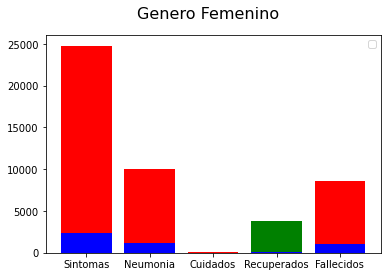

In [4]:
fig,ax=pp.subplots()

fig.suptitle('Genero Femenino', fontsize=16)

ax.bar('Sintomas',sintomas_adultos,color='r')
ax.bar('Sintomas',len(sintomas_menores_F),color='g')
ax.bar('Sintomas',sintomas_mayores,color='b')
ax.bar('Neumonia',len(nuemonia_adultos_F),color='r')
ax.bar('Neumonia',len(neumonia_menores_F),color='g')
ax.bar('Neumonia',len(nuemonia_mayores_F),color='b')
ax.bar('Cuidados',len(cuidados_adultos_F),color='r')
ax.bar('Cuidados',len(ciudados_menores_F),color='g')
ax.bar('Cuidados',len(cuidados_mayores_F),color='b')
ax.bar('Recuperados',len(recuperados_adultos_F),color='r')
ax.bar('Recuperados',len(recuperados_menores_F),color='g')
ax.bar('Recuperados',len(recuperados_mayores_F),color='b')
ax.bar('Fallecidos',len(fallecidos_adultos_F),color='r')
ax.bar('Fallecidos',len(fallecidos_menores_F),color='g')
ax.bar('Fallecidos',len(fallecidos_mayores_F),color='b')




ax.legend()


No handles with labels found to put in legend.


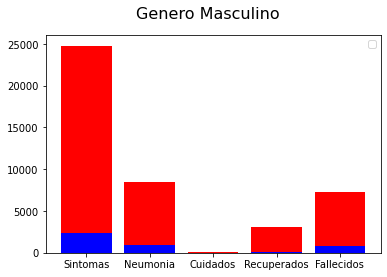

In [5]:
fig,ax=pp.subplots()

fig.suptitle('Genero Masculino', fontsize=16)

ax.bar('Sintomas',sintomas_adultos,color='r')
ax.bar('Sintomas',len(sintomas_menores_M),color='g')
ax.bar('Sintomas',sintomas_mayores,color='b')
ax.bar('Neumonia',len(nuemonia_adultos_M),color='r')
ax.bar('Neumonia',len(neumonia_menores_M),color='g')
ax.bar('Neumonia',len(nuemonia_mayores_M),color='b')
ax.bar('Cuidados',len(cuidados_adultos_M),color='r')
ax.bar('Cuidados',len(ciudados_menores_M),color='g')
ax.bar('Cuidados',len(cuidados_mayores_M),color='b')
ax.bar('Recuperados',len(recuperados_adultos_M),color='r')
ax.bar('Recuperados',len(recuperados_menores_M),color='g')
ax.bar('Recuperados',len(recuperados_mayores_M),color='b')
ax.bar('Fallecidos',len(fallecidos_adultos_M),color='r')
ax.bar('Fallecidos',len(fallecidos_menores_M),color='g')
ax.bar('Fallecidos',len(fallecidos_mayores_M),color='b')


ax.legend()




In [6]:


tabla=pd.DataFrame(columns=('Total','Sintomas','Neumonia','Cuidados Intensivos','Recuperados','Fallecidos'))
tabla.loc[len(tabla)]=[total_manores,sintomas_menores,neumonia_menores,cuidades_menores,recuperados_menores,fallecidos_menores]
tabla=tabla.rename(index={0:'Menores'})

tabla.loc[len(tabla)]=[total_adultos,sintomas_adultos,neumonia_adultos,cuidados_adultos,recuperados_adultos,fallecidos_adultos]
tabla=tabla.rename(index={1:'Adultos'})

tabla.loc[len(tabla)]=[total_mayores,sintomas_mayores,neummonia_mayores,cuidados_mayores,recuperados_mayores,fallecidos_mayores]
tabla=tabla.rename(index={2:'Mayores'})
tabla
tabla

Total Sintomas Neumonia Cuidados Intensivos Recuperados Fallecidos
Menores   7391      376      289                   3        3842        251
Adultos  24783    24783    18552                 187        6813      15897
Mayores   2337     2337     2187                  17         208       1893